<div class="alert alert-block alert-info">   

# BABS 502 Project  
#### Instructor: Martha Essak  

</div>

## Instructions and reminders for Jupyter notebooks

**Add markdown and code cells as needed to complete your project.** Please do not modify the headings of the sections.

Helpful notes abouts markdown in Jupyter to get you started:
* When you have a cell selected (by clicking on the white space to the left of the cell) in Command mode (blue box around the cell), press `a` or `b` to add a cell "above" or "below"
* In Command mode, press `d` twice to delete the cell. Press z to undo deleting a cell
* In Command mode, press `m` to change a code cell to a markdown cell, or press `y` to change a markdown cell to a code cell
* In Command mode, press `x` to cut cell, `c` to copy cell, and `v` to paste cell below the selected cell
  
* Double click a cell to enter Edit mode (green box around the cell), or press `Enter`
* Add two empty spaces at the end of a line to add a line break
* Press `shift + enter` to execute a cell to see either the formatted version (for a markdown cell) or to run the code (for a code cell). This will cause you to leave edit mode.
* Press `Ctrl + Shift + -` to split the current cell into two cells where the cursor is
* Press `Shift + m` to merge multiple cells. You can use `Shift + up arrow` or `Shift + down` arrow to select multiple cells.



[See cheat sheet for Markdown in Jupyter for more details](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd)

### Names of students:

Yiwei Wu (31798101)  
Xinan Xu (98416811) 


---

## Table of Contents
[Project description](#Description)  
[Part A: Time plot, trying transformations/adjustments, creating training and test set](#PartA)  
[Part B](#PartB)  
[Introduction & Approach](#Introduction)  
[Exploratory Data Analysis](#EDA1)  
[Potential causes of patterns](#Causes)   
[Exponential Smoothing Model](#ETS)  
[ARIMA model](#ARIMA)  
[Comparison of models](#Compare)  
[Forecasts](#Forecast)  
[Discussion](#Discussion)  
[Explanatory model](#Explanatory)


[Appendix A: ETS Models](#AppendixA)  
[Appendix B: ARIMA Models](#AppendixB)

---

<div class="alert alert-block alert-info">   
<a id="Description"></a>

# Project description

**Objective**  

The main goal of this project is to develop a model to forecast monthly energy use for the Vancouver International Airport (YVR).  

<br>

**Introduction**  

Budget planning at YVR requires forecasting the cost of energy to operate the airport. An accurate forecast could help the YVR representatives negotiate more favourable contracts with energy suppliers.

<br>

**Data Available**  

Data was taken from 14 years of records from the YVR database. This data set includes information on date, energy use, temperature, terminal area, and number of passengers. Data have been aggregated by month into 168 records (14 years with 12 months each).  

<br>


| # | Variable | Definition |  
| :- | :- | :- |  
| 1 | month | Month and year, e.g.: Nov-98 |
| 2 | energy | Energy use measured in thousands of kilowatt hours (kWh) |
| 3 | mean.temp | Mean monthly temperature outside (degrees Celsius) |
| 4 | total.area | Total area of all terminals (sq. m.) |
| 5 | total.passengers | Total number of passengers in thousands |
| 6 | domestic.passengers | Total number of domestic passengers (traveling within Canada) in thousands |
| 7 | US.passengers | Total number of passengers traveling between Canada and the US in thousands |
| 8 | international.passengers | Total number of passengers traveling between YVR and countries other than Canada/US |


In this project, you will develop appropriate models, compare the models, and discuss advantages and limitations of each model. You should select the best model and use it to provide monthly forecasts for energy use for the next three years (January 2011 through December 2013).   
    </div>

---

<div class="alert alert-block alert-info">   

# Part A (3.5 marks)
## Time plot, trying transformations/adjustments, creating training and test set
### See Canvas submission called "Project: Part A" for detailed questions and points breakdown.
<a id="PartA"></a>  

</div>

In [1]:
library(fpp2) 
# data() 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching packages ────────────────────────────────────────────── fpp2 2.4 ──

✔ ggplot2   3.4.0     ✔ fma       2.4  
✔ forecast  8.19      ✔ expsmooth 2.3  






### Import the data

In [2]:
YVR <- read.csv(file="/Users/anthonyxu/Desktop/UBC documents/P3/BABS502/Final Project/Energy use at YVR.csv", header=TRUE)
head(YVR)

,month,energy,mean.temp,total.area,total.passengers,domestic.passengers,US.passengers,international.passengers
,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,Jan-97,5958,3.9,202966,1068.36,573.84,263.13,231.38
2,Feb-97,5859,5.0,202966,1040.30,570.36,267.39,202.56
3,Mar-97,5230,6.3,202966,1195.47,632.68,319.09,243.71
4,Apr-97,5654,9.1,202966,1086.42,599.11,265.37,221.94
5,May-97,5618,14.0,202966,1244.52,673.70,307.55,263.27
6,Jun-97,5963,15.6,202966,1352.89,729.84,333.89,289.16


In [3]:
#Transfer the raw dataset into a time series
YVR.ts <- ts(YVR[,2:8],start=c(1997,1),frequency =12)
#YVR.ts


### Time plot

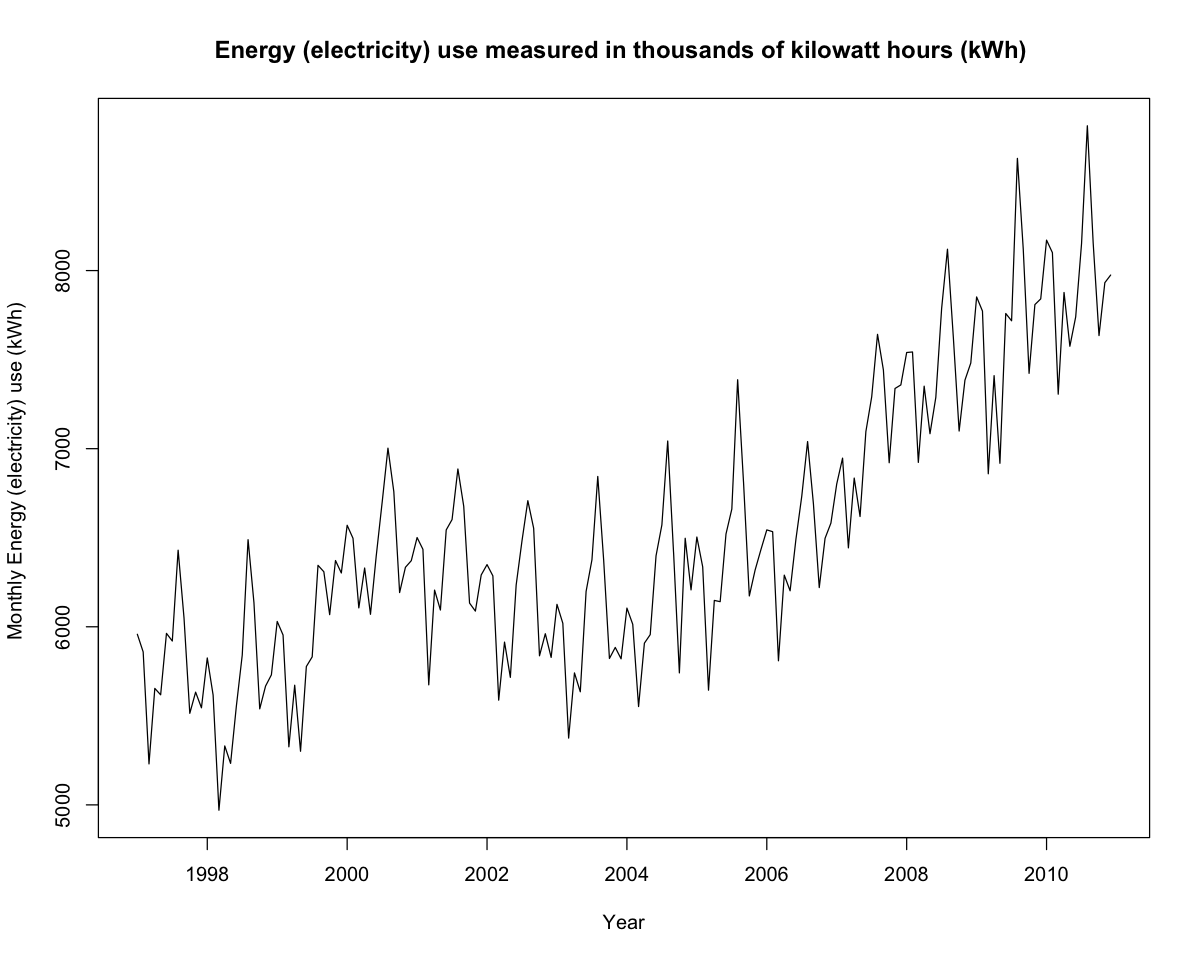

In [5]:
#Change plot size to 10 x 8
options(repr.plot.width=10, repr.plot.height=8)

YVR.ts.energy <- YVR.ts[,1]

plot(YVR.ts.energy,main="Energy (electricity) use measured in thousands of kilowatt hours (kWh) ",
    xlab="Year",ylab="Monthly Energy (electricity) use (kWh) ")


### Box-Cox transformation

[1] 0.6931483

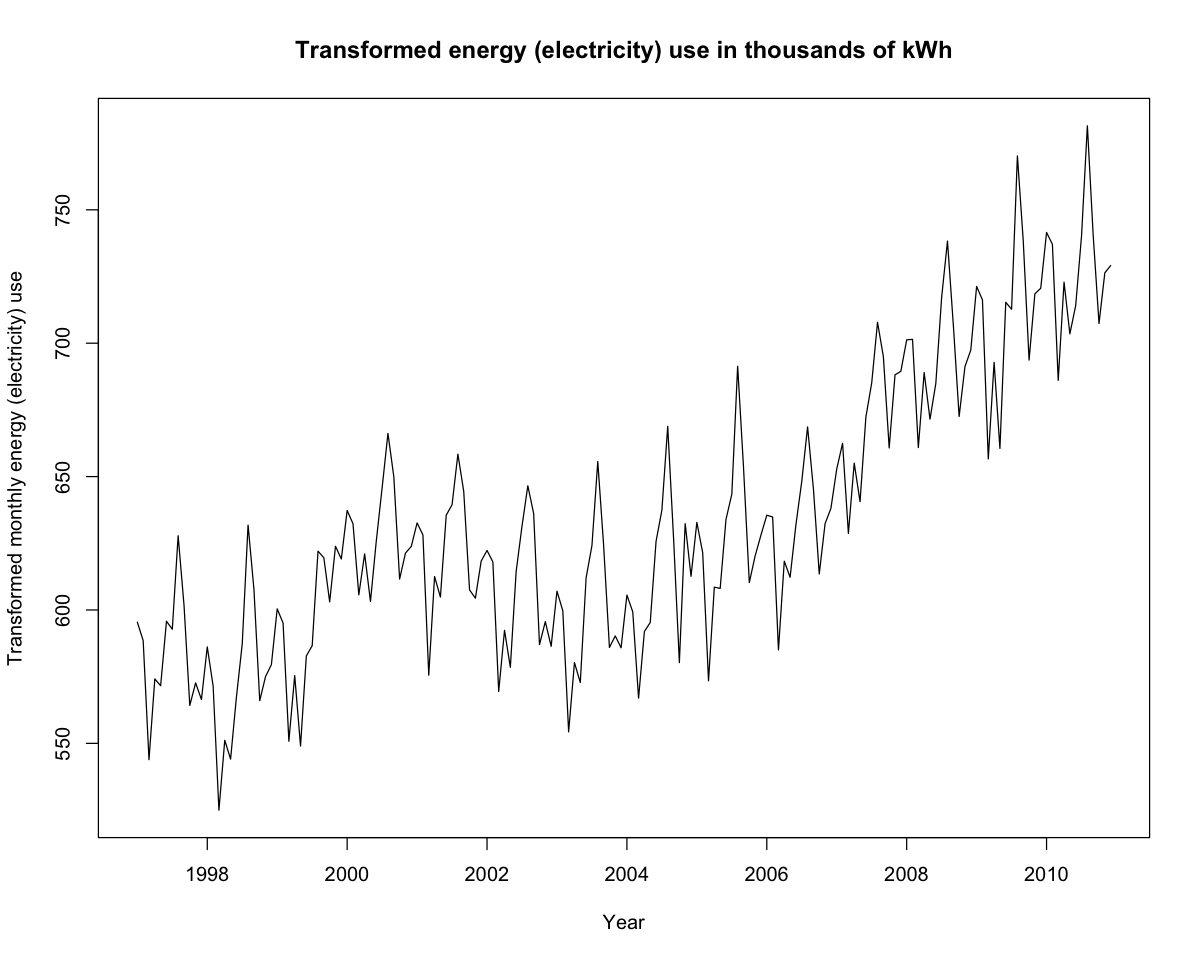

In [19]:
#Box-Cox transformation of the electricity use data
lambda <- BoxCox.lambda(YVR.ts.energy);
lambda
plot(BoxCox(YVR.ts.energy,lambda), ylab="Transformed monthly energy (electricity) use",
     xlab="Year", main="Transformed energy (electricity) use in thousands of kWh")

The purpose of BoxCox transformation is to make seasonal variation approximately equal. For the YVR energy dataset, this transformation is not effective as there isn't much variation from the seasonal component.


### Calendar adjustment for number of days in each month

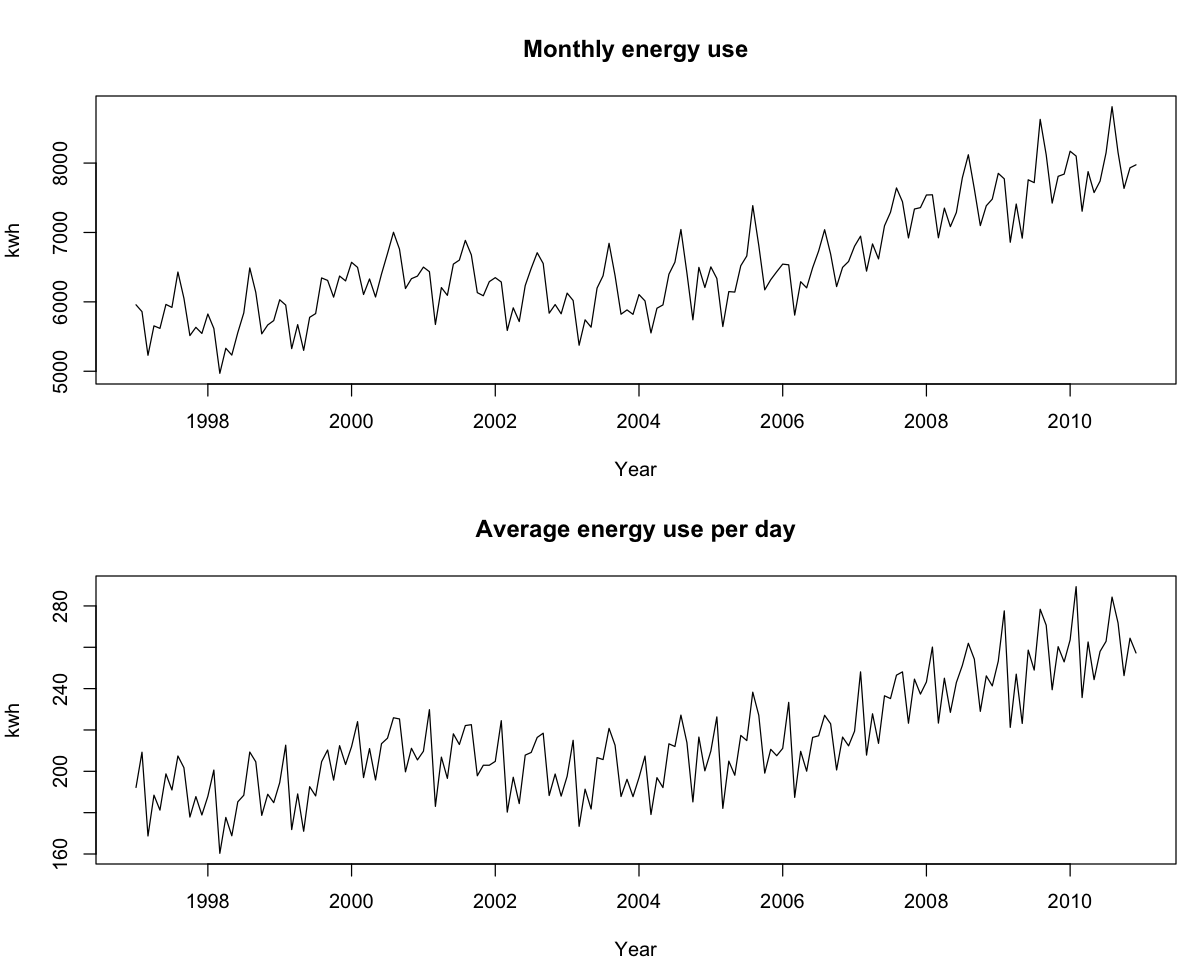

In [20]:
par(mfrow=c(2,1), mar=c(4,4,4,1))
plot(YVR.ts.energy, main="Monthly energy use", ylab="kwh",xlab="Year")
plot(YVR.ts.energy/monthdays(YVR.ts.energy), main="Average energy use per day", ylab="kwh", xlab="Year")


The purpose of calendar adjustment is to remove variations from different number of days/weekdays in a month. In the case of the energy data, calendar adjustment is not effective as it seems like there are more peaks and valleys, which indicates that it is not effective.

### Divide the data into the training set and the test set

In [21]:
energy.train <- window(YVR.ts.energy, end=c(2007,12));energy.train 
energy.test <- window(YVR.ts.energy, start=c(2008,1));energy.test

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1997,5958,5859,5230,5654,5618,5963,5920,6430,6053,5514,5633,5545
1998,5825,5617,4970,5331,5233,5557,5841,6489,6138,5539,5667,5730
1999,6030,5954,5326,5672,5301,5777,5831,6345,6309,6068,6372,6302
2000,6570,6497,6106,6330,6070,6401,6697,7003,6760,6192,6334,6371
2001,6501,6435,5674,6206,6094,6544,6602,6886,6677,6133,6088,6291
2002,6349,6286,5588,5914,5716,6235,6483,6708,6553,5837,5961,5828
2003,6126,6020,5375,5741,5635,6199,6376,6844,6379,5822,5884,5820
2004,6105,6014,5552,5908,5956,6399,6572,7043,6418,5741,6497,6207
2005,6504,6337,5644,6148,6141,6521,6661,7387,6815,6173,6319,6434
2006,6544,6534,5809,6290,6202,6492,6733,7040,6690,6220,6497,6582


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2008,7540,7543,6923,7351,7084,7288,7788,8120,7628,7099,7385,7481
2009,7852,7773,6859,7410,6918,7759,7718,8630,8121,7423,7809,7841
2010,8171,8101,7306,7877,7575,7740,8149,8813,8154,7635,7932,7975


----

<div class="alert alert-block alert-info">   

# Part B
### Note that Part B includes everything below this header
<a id="PartB"></a>  

</div>

<div class="alert alert-block alert-danger">
    
### Make sure that your code is organized and includes useful annotations and written descriptions of what you are seeing on plots or the conclusions that you are drawing. (0.5 marks)
  
### Prepare all plots for publication by including detailed axis labels.
    
### Complete anwers will include observations and conclusions/interpretations.
<div>

<div class="alert alert-block alert-success">
<a id="Introduction"></a>  

# Introduction & Approach (250 words max.) (2 marks)
Write an introduction to the project and explain the overall approach.  

What to include: objective and purpose of the analysis, background information, brief description of the approach that is being taken in the analysis. If you include any references, please put the bibliographical information at the end of your introduction; this does not contribute to the word count. **Make sure to write in your own words.**  

</div>

Project objective is to develop a forecast model to predict monthly energy use for the Vancouver International Airport (YVR) for the next 3 years using 14 years of historical energy usage data. Since the goal is to forecast 3 years into the future, historical dataset is segmented into 11 years (1997-2007) of training set and 3 years of test set (2008-2010). 
The following steps are taken to arrive at an appropriate forecast model:
1.	Exploratory data analysis: Identify existence of trend, seasonality, and unusual features in energy use data. 
2.	Choose & Fit Model: 
    2a. Fit basic forecasting methods on training set and compare accuracy against test set. 
    2b. Given the existence of trend and seasonality, identify appropriate parameters to use for ETS model, and compare accuracy against test set.
    2c. Given the existence of trend and seasonality, identify appropriate parameters to use for Arima model, and compare accuracy against test set.
3. Select best model and address reasons for not choosing the alternatives as well as limitations to consider.


----

<div class="alert alert-block alert-warning">
<a id="EDA1"></a>

# Exploratory Data Analysis (300 words max.) (4 marks)  

Create plots of the electricity use data (**use all the data, not just the training set**); prepare them as if for publication and upload them. Include a decomposition plot from STL decomposition.  

Describe the characteristics of trend, cycle and seasonality in detail, referring to specific characteristics of the plots. Also mention any unusual features, if present. Be specific.  

<br>

Organize your answers as follows:  

Seasonality: ...  
    
Trend/cycle: ...  

Unusual features: ...  
</div>

**Time Plot**

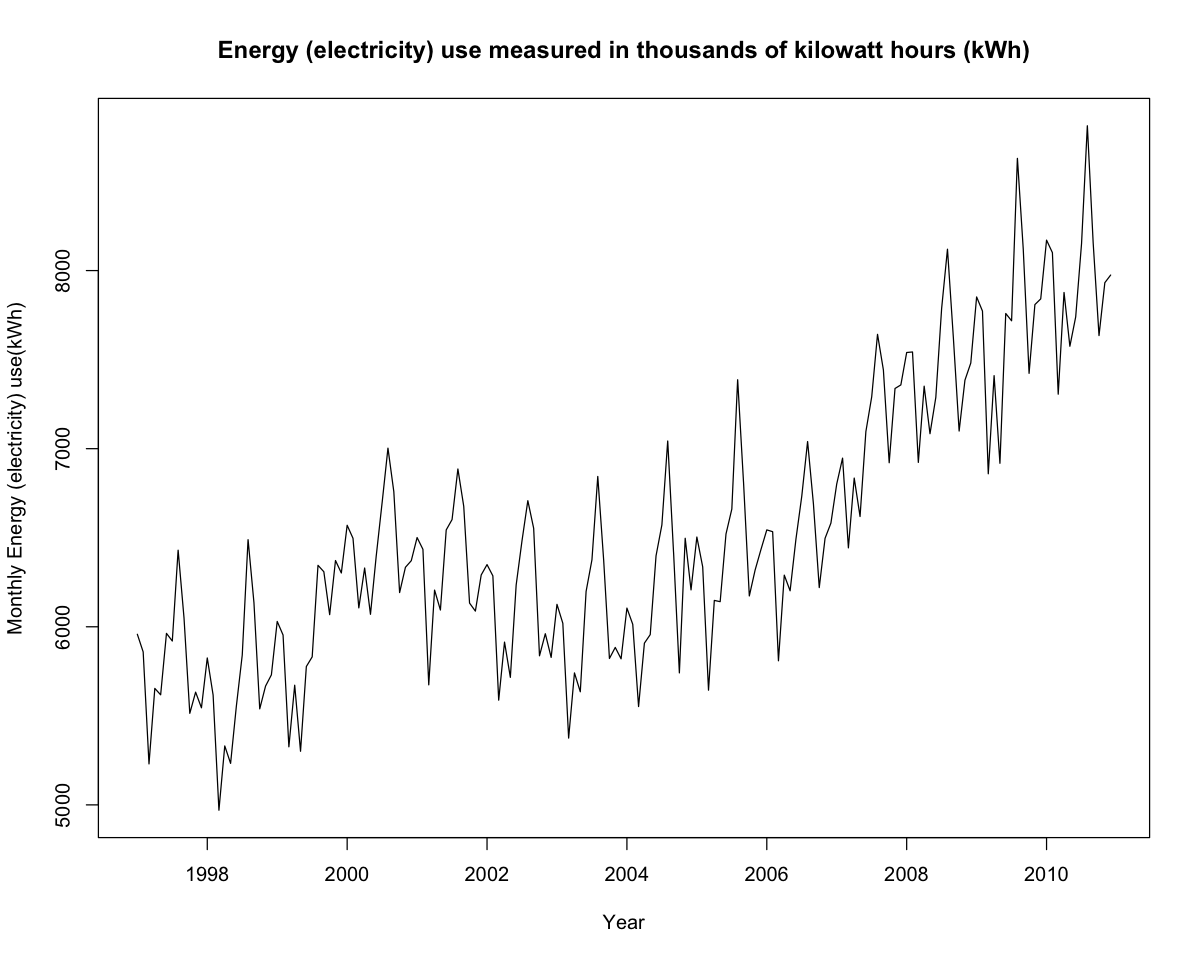

In [22]:
plot(YVR.ts.energy,main="Energy (electricity) use measured in thousands of kilowatt hours (kWh)",
    xlab="Year",ylab="Monthly Energy (electricity) use(kWh)")

**Decomposition plot from STL decomposition**

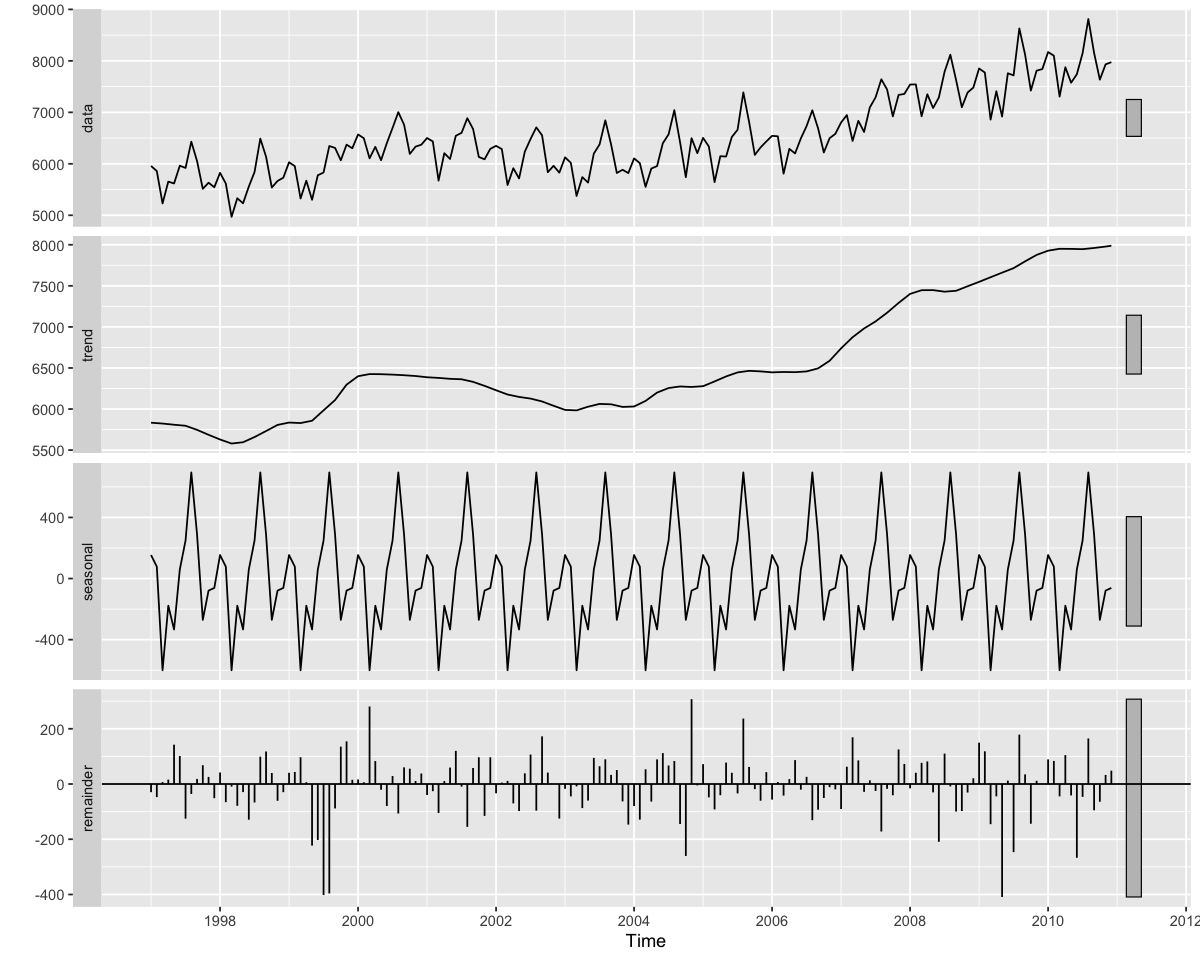

In [23]:
fit.stl <- stl(YVR.ts.energy, t.window=13, s.window="periodic", robust=TRUE)
autoplot(fit.stl)

**Description:**

Seasonality: There is an annual seasonality with a valley in March, followed by a peak in the summer months. The magnitude of seasonality seems to scale slightly with trend.

Trend/cycle: There is a slight linear upwards trend from 1997 to mid-2006. Afterwards, there is a greater linear upwards trend from mid-2006 to 2010. There is not enough data to infer whether this is part of a cycle or not.

Unusual features: There is unusual activity in the latter half of 1999 that causes energy use to decline. 


<div class="alert alert-block alert-warning">
<a id="Causes"></a>

# Potential causes (300 words max.) (3 marks)

Describe what could be causing the patterns that you are seeing in electricity use. Create any relevant plots and include them. Make sure to discuss any specific features of plots. Remember that the original dataset includes other variables! (300 words max.)  
</div>

There may be two causes for the upward trend, the first is the construction of the international terminal building and a 3rd runway which was completed in 1996. The second is an ongoing Pier D expansion with more areas added in 2006. These allow the airport to handle more international flights, which resulted in the rise of us and international passengers post completion of these two expansion projects. For the upwards trend beginning mid-2006, the main cause is an increase in both domestic and international passengers.   

Seasonality may be due to a combination of passengers and weather. Peak energy use is in the summer months which are also the hottest months in Vancouver and air conditioning is required. Total passenger volume also happens to be the highest in the summer, which requires more energy use. 

APA Citations:
Photos: Vancouver International Airport (1960-2000). A Visual History of the World's Great Airports. (n.d.). Retrieved February 4, 2023, from https://www.airporthistory.org/yvr-1960-2000.html 

Pier D expansion | YVR. (n.d.). Retrieved February 5, 2023, from https://www.yvr.ca/en/about-yvr/who-we-are/pier-d-expansion 



----

<div class="alert alert-block alert-success">
<a id="Basic"></a>

# Basic forecasting methods
</div>  

Use the basic methods we have learned to develop forecasts for the test set. Plot in the following colours:  

mean method (blue)  
drift method (green)  
naïve method (red)  
seasonal naïve method (purple)  

 
## Visual comparison and assessment of basic methods (1.25 marks)

Plot the training set and test set data in black. Include the forecasts of the test set for each of the basic forecasting methods in a different colour (colours are given above) with a legend to explain.  

Prepare the plot for publication and upload it.

 

From a visual assessment, which of the basic forecasting methods seems to produce the best forecasts of the test set? Discuss briefly. (4 sentences max.)  
    

In [24]:
# mean method 
fit1 <- meanf(energy.train, h=36)
# drift method
fit2 <- rwf(energy.train, h=36, drift = TRUE)
# naïve method 
fit3 <- naive(energy.train, h=36)
# seasonal naïve method 
fit4 <- snaive(energy.train, h=36)

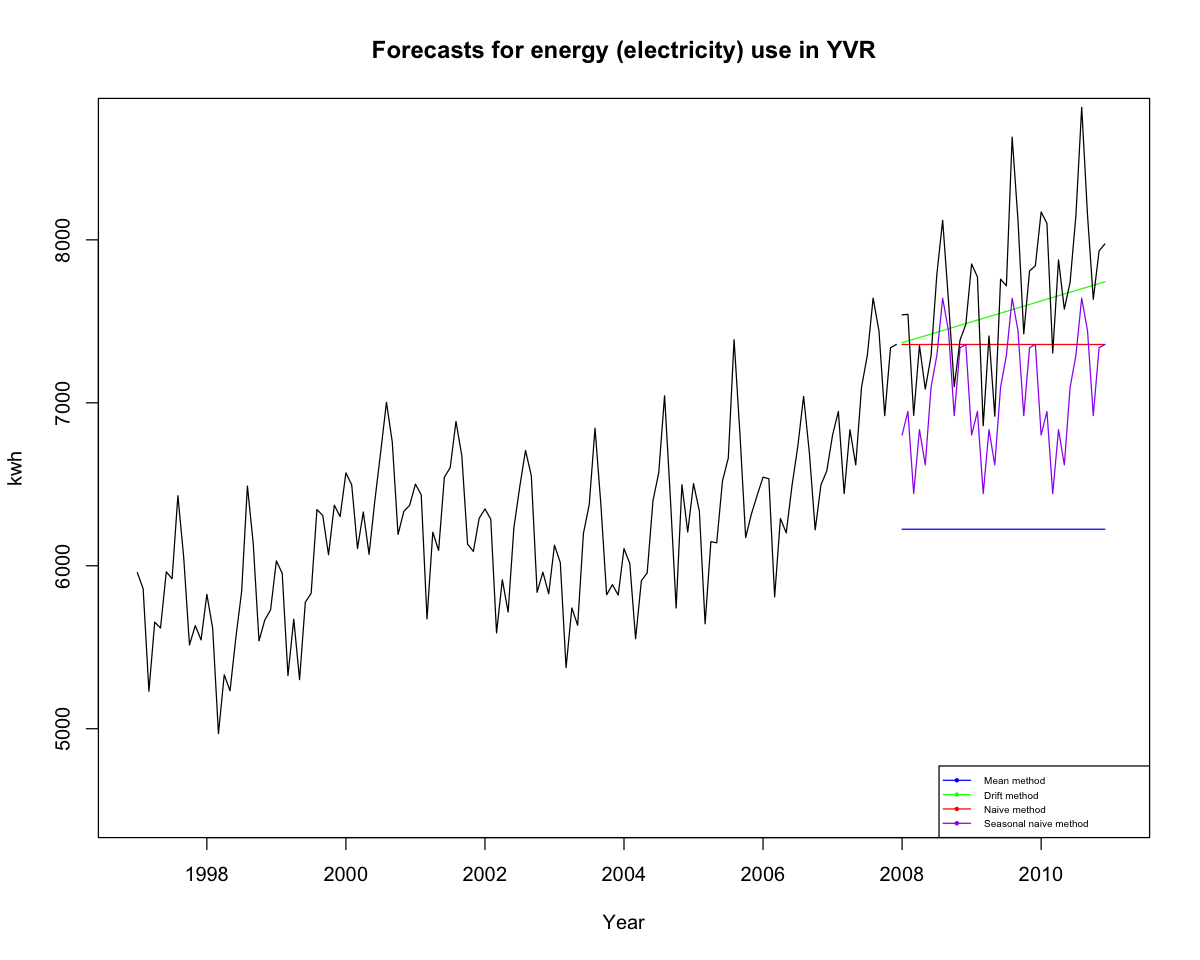

In [25]:
plot(energy.train, main="Forecasts for energy (electricity) use in YVR",
     ylab = "kwh", xlab = "Year",xlim=c(1997,2011),ylim=c(4500,8700))
lines(fit1$mean,col="blue")
lines(fit2$mean,col="green")
lines(fit3$mean,col="red")
lines(fit4$mean,col="purple")
lines(energy.test)

legend("bottomright",lty=1,col=c("blue","green","red","purple"),
       legend=c("Mean method","Drift method","Naive method","Seasonal naive method"),cex=0.5,pch=16
      )

From a visual assessment, the drift method is the best, because the drift method can capture the trend of the dataset.
Besides, the forecast from drift method seems like more closer to the actual data compared with other methods.

## Accuracy measures (1 mark)
Create a table with the RMSE, MAE, MAPE, and MASE for the test set for each of the four basic methods. Round values to 1 decimal place.

In [26]:
method <- c("mean method", "drift method", "naive method", "seasonal naive method")
basic_accuracy <- cbind(method, 
      rbind(accuracy(fit1,energy.test)[2,c(2,3,5,6)],
      accuracy(fit2,energy.test)[2,c(2,3,5,6)],
      accuracy(fit3,energy.test)[2,c(2,3,5,6)],
      accuracy(fit4,energy.test)[2,c(2,3,5,6)]))
basic_accuracy

method,RMSE,MAE,MAPE,MASE
mean method,1528.49822382884,1463.79545454545,18.7755758201661,5.52410386016273
drift method,415.979012553523,328.482400339271,4.21328577080877,1.23963419210996
naive method,550.058809987118,443.194444444444,5.60345284112793,1.67253705683796
seasonal naive method,698.657283652006,626.833333333333,8.03862417905933,2.36555758223788


## Comparison of basic methods (1 mark)
Based on the accuracy measures for the test set, which of the basic forecasting methods seems to forecast the test set the best? Interpret the MASE for this method. (4 sentences max.) 

Drift method seems to forecast the best forecast method for the test set with the lowest RMSE, MAE, MAPE and MASE score. This is due to Drift method accounting for trend component of the training set. 

----

<div class="alert alert-block alert-success">
<a id="ETS"></a>

# Exponential Smoothing (ETS) model

Fit ETS models to the training set. Find your best model and present it here. Include any other models you tried in **Appendix A**.
    
</div>    

## What is the model, using the ETS(__, __, __) notation? (0.25 marks)

In [105]:
#The best ETS model
fit.ets<- ets(energy.train, model="MAA", damped=FALSE);fit.ets

ETS(M,A,A) 

Call:
 ets(y = energy.train, model = "MAA", damped = FALSE) 

  Smoothing parameters:
    alpha = 0.8082 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 5803.689 
    b = 17.436 
    s = -37.9185 -34.4259 -248.9098 320.0811 666.5463 231.972
           63.7197 -351.3296 -188.4109 -568.7838 53.8096 93.6498

  sigma:  0.0218

     AIC     AICc      BIC 
1957.628 1962.996 2006.636 

## What are the estimates of the smoothing parameters? (0.25 marks)

The estimates of the smoothing parameters:

alpha = 0.8082; beta = 0.0001; gamma = 0.0001


## Explain why this model is appropriate based on the features of the data. (4 sentences max.) (1.5 marks)

This model is appropriate as there is additive trend and additive seasonality in the dataset. Given magnitude of seasonality scales with trend, multiplicate error is more appropriate than additive error.

## Model plot (0.75 marks)

Create a time plot of the data in black with a gap between the training set and test set data.

Show the fitted values of the model graphed in blue. Show the forecasts for the test set with a bold blue line and the 80% and 95% prediction intervals as shaded regions.

Prepare this plot for publication and upload it.

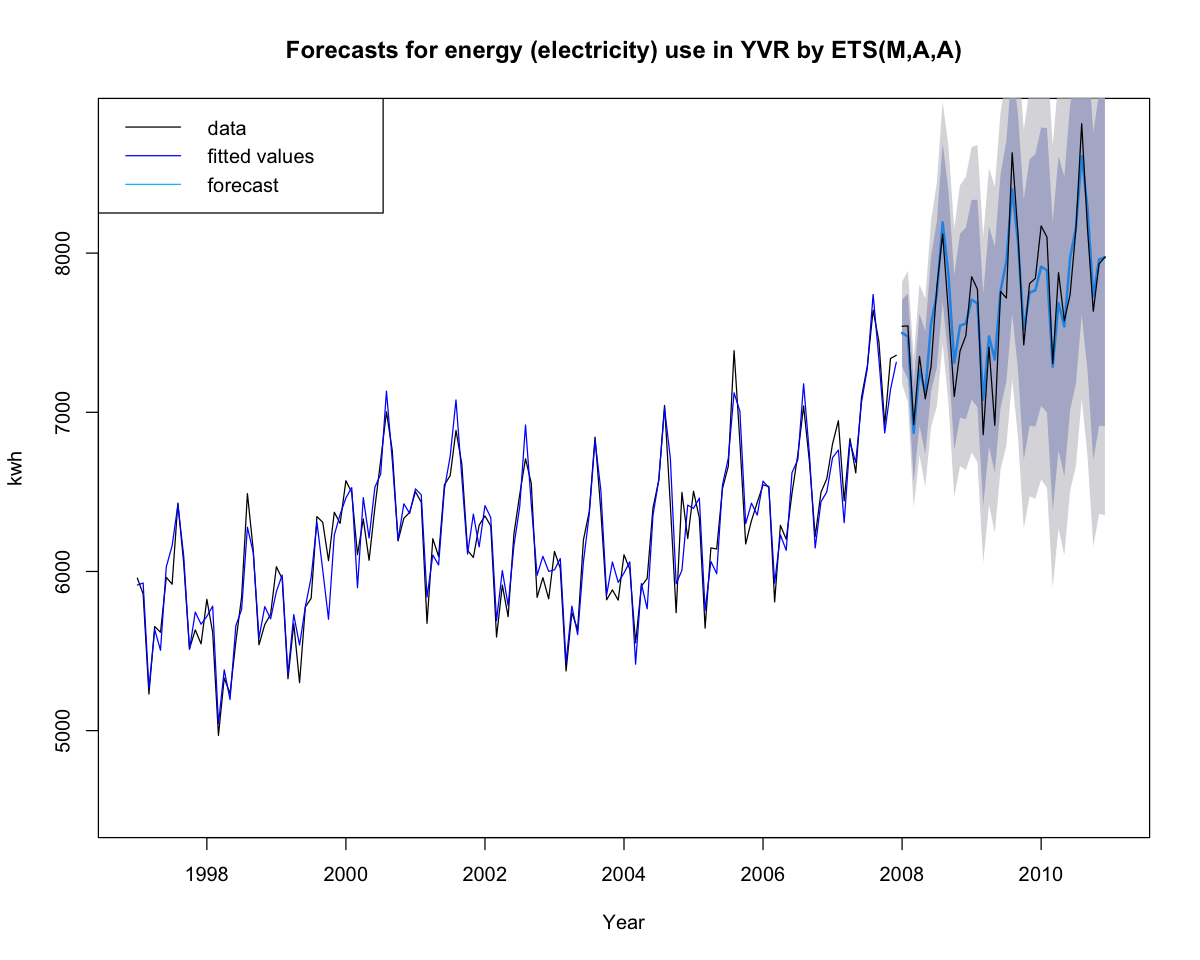

In [28]:
plot(forecast(fit.ets,36), main="Forecasts for energy (electricity) use in YVR by ETS(M,A,A)",
      ylab = "kwh", xlab = "Year",xlim=c(1997,2011),ylim=c(4500,8800))
lines(energy.test) 
lines(fitted(fit.ets), col="blue") 
legend("topleft",lty=1, col=c("black","blue","deepskyblue"),c("data","fitted values","forecast")) 

## Goodness of fit (1 mark)

Quantify and discuss the goodness of fit of the model to the training set. You can compare this model to other ETS models that you tried. (Present any values, then 4 sentences max.)

In [71]:
# The code to create the table is included in Appendix A
ets_accuracy

ets.models,RMSE,MAE,MAPE,MASE
final.ets.model,159.107883503278,126.27640468394,1.69508827335497,0.476544706021537
fit.cets1,472.406055317822,377.632570007381,4.88094130788208,1.42511819614082
fit.cets2,401.692078131953,316.864542243945,4.26444445563058,1.19579046069795
fit.cets3,249.836172030664,196.231594856607,2.53324844896596,0.740543159406026
fit.cets4,459.220423700894,364.748777157687,4.72108211866939,1.37649705198196
fit.cets5,249.422121023095,196.993618537518,2.54183420192762,0.74341890133034
fit.cets6,158.428396804037,130.920396628833,1.72536819500591,0.494070306165796


This model has relatively low AIC and AICc and has the lowest RMSE, MAE, MAPE and MASE compared to the candidate models. Hence, out of all the models, this model has the highest accuracy while not overfitting. 

## Accuracy measures (1 mark)
Calculate the accuracy measures (RMSE, MAE, MAPE, MASE) to show how well the model forecasts for the test set.

In [29]:
#The accuaracy of the ETS model
accuracy(forecast(fit.ets,36),energy.test)[2,c(2,3,5,6)]

RMSE         MAE        MAPE        MASE 
155.9826267 123.1789301   1.6140187   0.4648554

In [18]:
#The accuaracy of the basic forecast methods
basic_accuracy

method,RMSE,MAE,MAPE,MASE
mean method,1528.49822382884,1463.79545454545,18.7755758201661,5.52410386016273
drift method,415.979012553523,328.482400339271,4.21328577080877,1.23963419210996
naive method,550.058809987118,443.194444444444,5.60345284112793,1.67253705683796
seasonal naive method,698.657283652006,626.833333333333,8.03862417905933,2.36555758223788


## Accuracy of forecasts (1 mark)
Discuss how well this model forecasts the test set based on any plots or values that you calculated in previous questions. Remember that you can compare it to the basic methods. (4 sentences max.)

Compared with the four basic methods, the ETS model has a much higher accuracy in terms of RMSE, MAE, MAPE, MASE. Besides the ETS model not only can capture the trend of the actual data, but also can capture the seasonality of it.

## Residual diagnostics (3.5 marks)

a) Calculate the mean of the residuals. Does this value indicate bias? (0.5 marks)  
b) Use the checkresiduals() function. Which properties of residuals have been met or not met according to these plots? (2 marks)  
c) Interpret the results of a portmanteau test for autocorrelations. Clearly state the hypotheses, the number of lags tested, the test statistic, p-value, decision, and concluding sentence. (1 mark)  

In [72]:
mean(residuals(fit.ets))

[1] -0.001043112

The mean of residuals that is significantly different from zero could indicate a bias in the model, as it means that the model is systematically under-predicting or over-predicting the target values. The mean of the residuals of the best ETS model is about -0.001, which is not necessarily indicative of a bias since it is not significantly different from zero. 


	Ljung-Box test

data:  Residuals from ETS(M,A,A)
Q* = 12.469, df = 8, p-value = 0.1315

Model df: 16.   Total lags used: 24



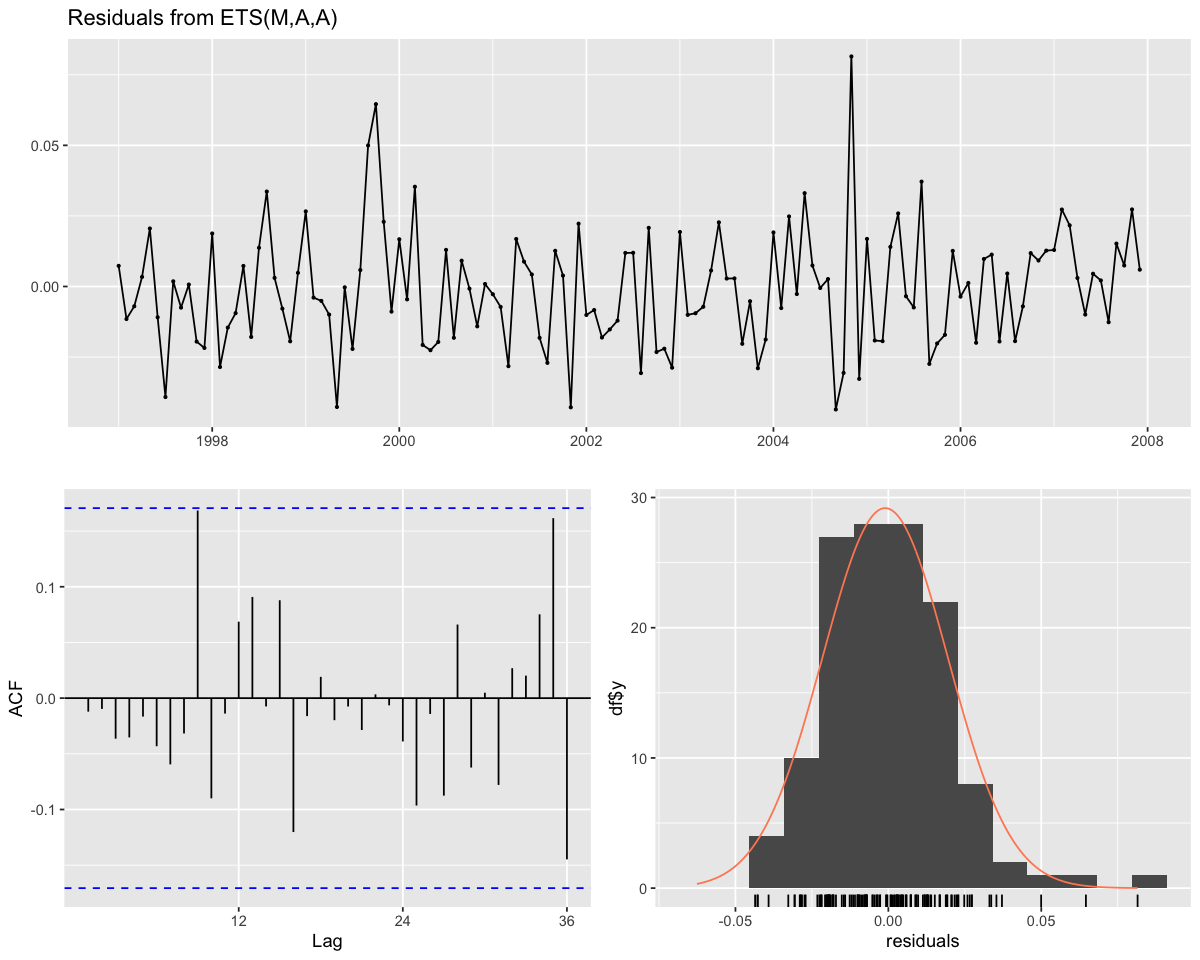

In [73]:
checkresiduals(fit.ets)

**(1)Time series plot of the residuals:**

The time series plot of the residuals shows that the residuals are randomly distributed around zero with no clear patterns or trends, which means the model is able to capture important features of the time series.


**(2)ACF plot of the residuals:**

The ACF plot of the residuals shows that the ACF is close to zero for almost all lags, which indicates there is no autocorrelation in the residuals. It could suggest that the model is capturing important features of the time series.

**(3)Histogram of the residuals:**

The histogram of the residuals indicates that the residuals can be considered as normally distributed.


The p-value of the Ljung-Box test is about 0.1315, which is greater than 0.05. In Ljung-Box test, when the p-value is large (greater than 0.05), it indicates that there is not enough evidence to reject the null hypothesis, and that the residuals are likely to be independently and identically distributed with zero autocorrelation. This suggests that the time series model is a good fit for the data.

----

<div class="alert alert-block alert-success">
<a id="ARIMA"></a>
    
# ARIMA model
    
Fit ARIMA models to the training set. Find your best model and present it here. Include any other models you tried in **Appendix B**.
    
</div>    

## What is the model, using the ARIMA(p, d, q)X(P, D, Q)m notation? (0.25 marks)

In [53]:
fit.arima<- Arima(energy.train, order = c(0, 1, 1), seasonal = c(0, 1, 1),include.constant=TRUE);fit.arima

Series: energy.train 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.2021  -0.9006
s.e.   0.0909   0.1912

sigma^2 = 18710:  log likelihood = -762.5
AIC=1531   AICc=1531.21   BIC=1539.33

## What are the estimates of the parameters? (0.25 marks)

Estimates of the parameter:
ma1: -0.2021;
 sma1: -0.9006

## Appropriateness of model (2 marks)
Explain why this model is appropriate based on the features of the data. Include the ACF and PACF plots of the differenced data. (5 sentences max.)

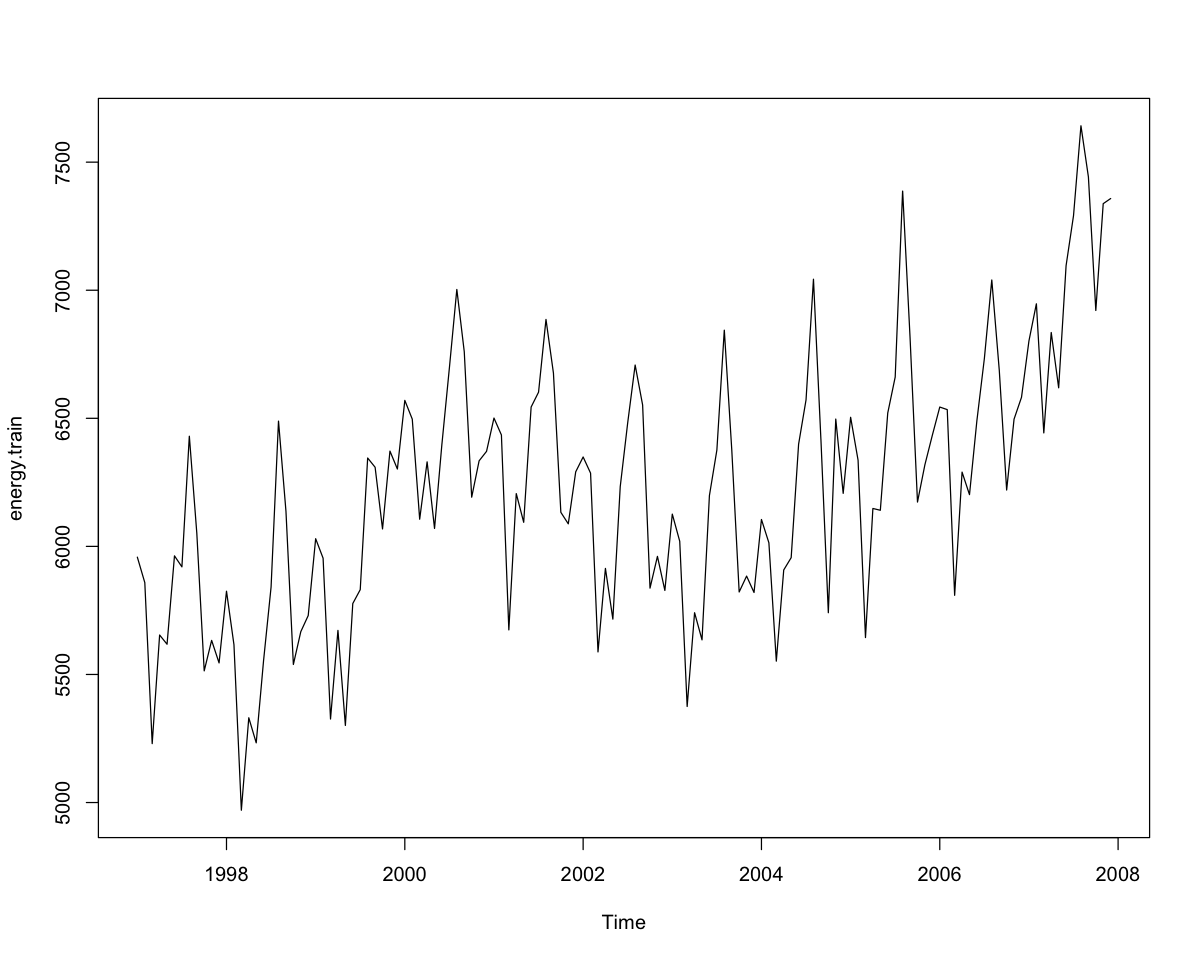

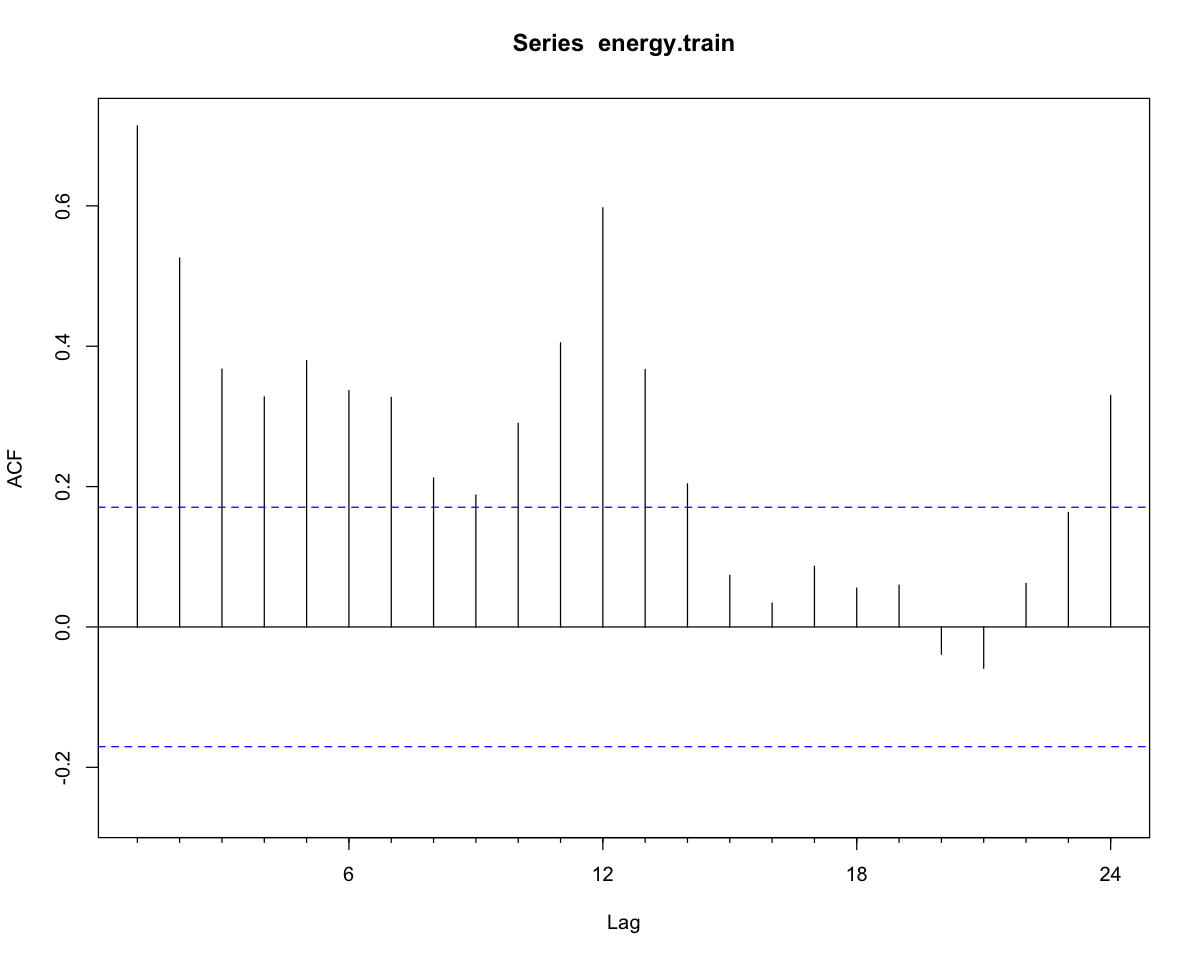

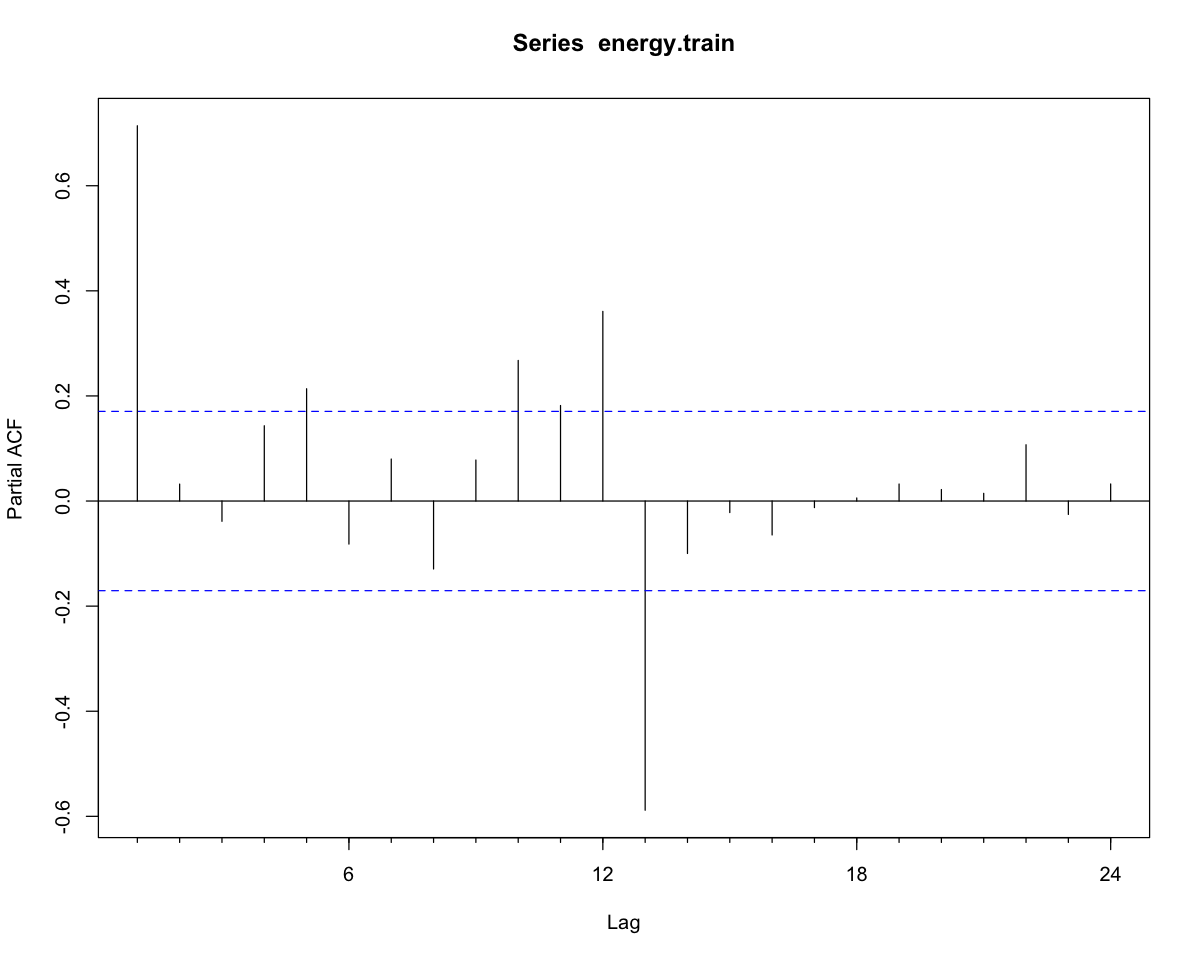

In [31]:
plot(energy.train)
Acf(energy.train)
Pacf(energy.train)

This model is appropriate as the time plot and ACF plot of the dataset shows trend and seasonality.

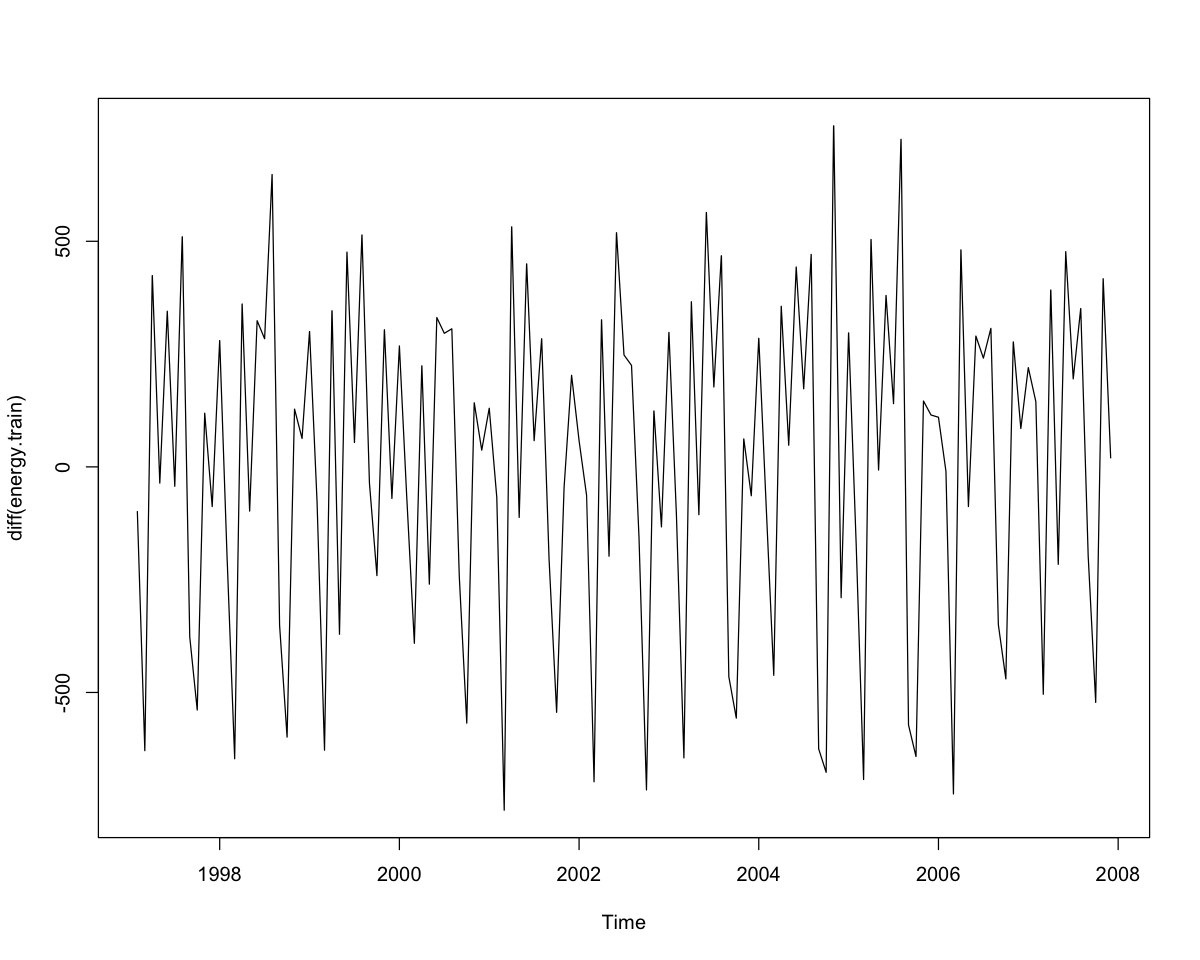

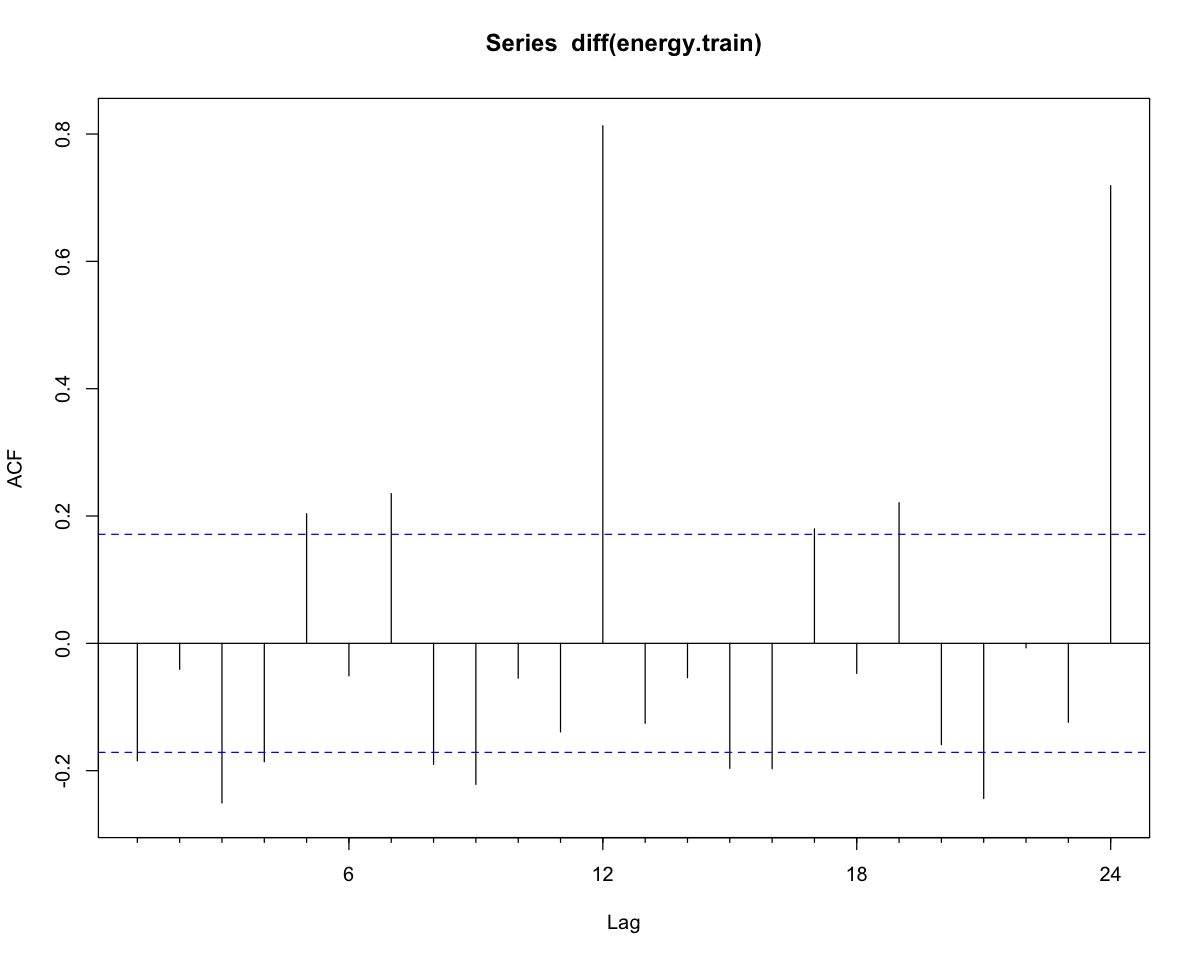

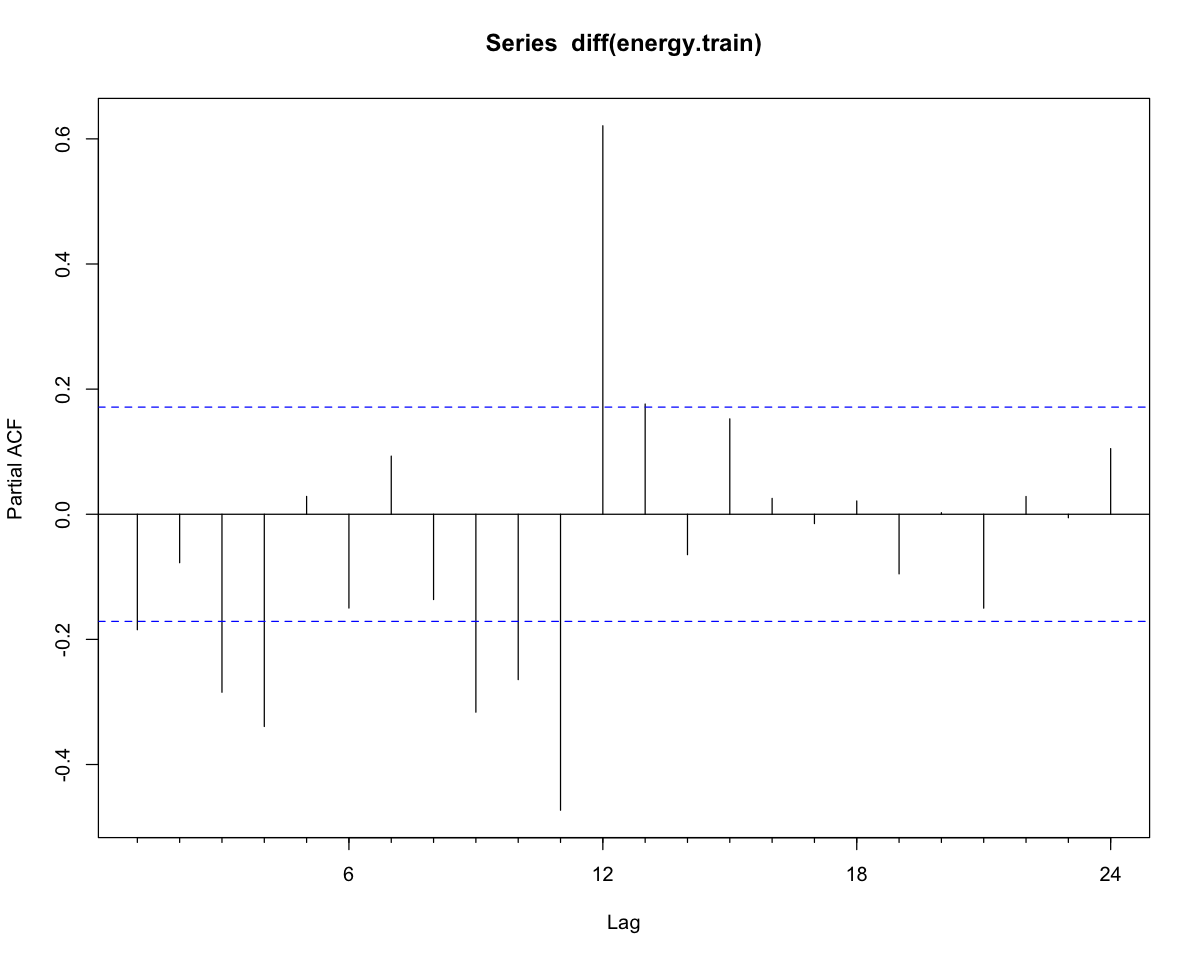

In [32]:
plot(diff(energy.train))
Acf(diff(energy.train))
Pacf(diff(energy.train))

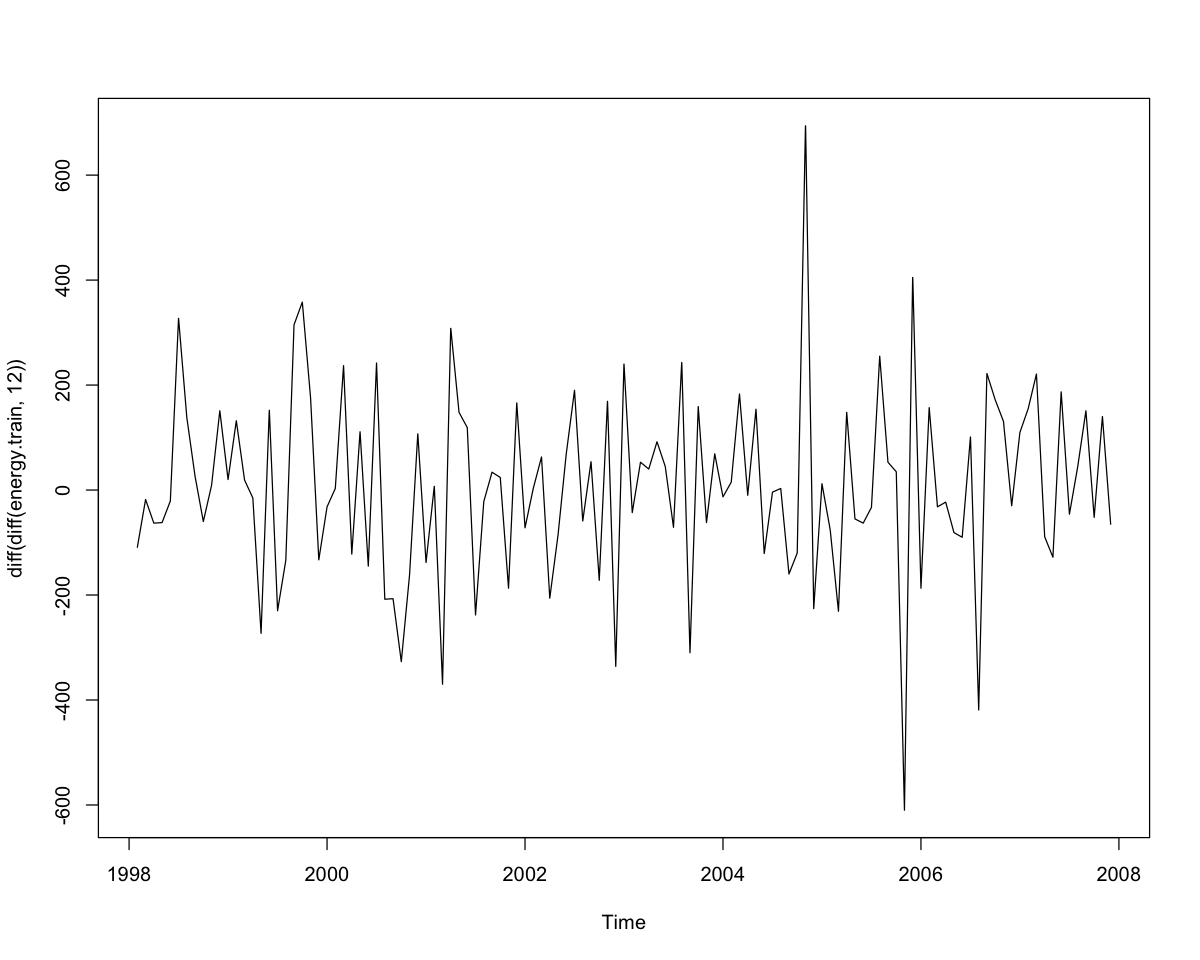

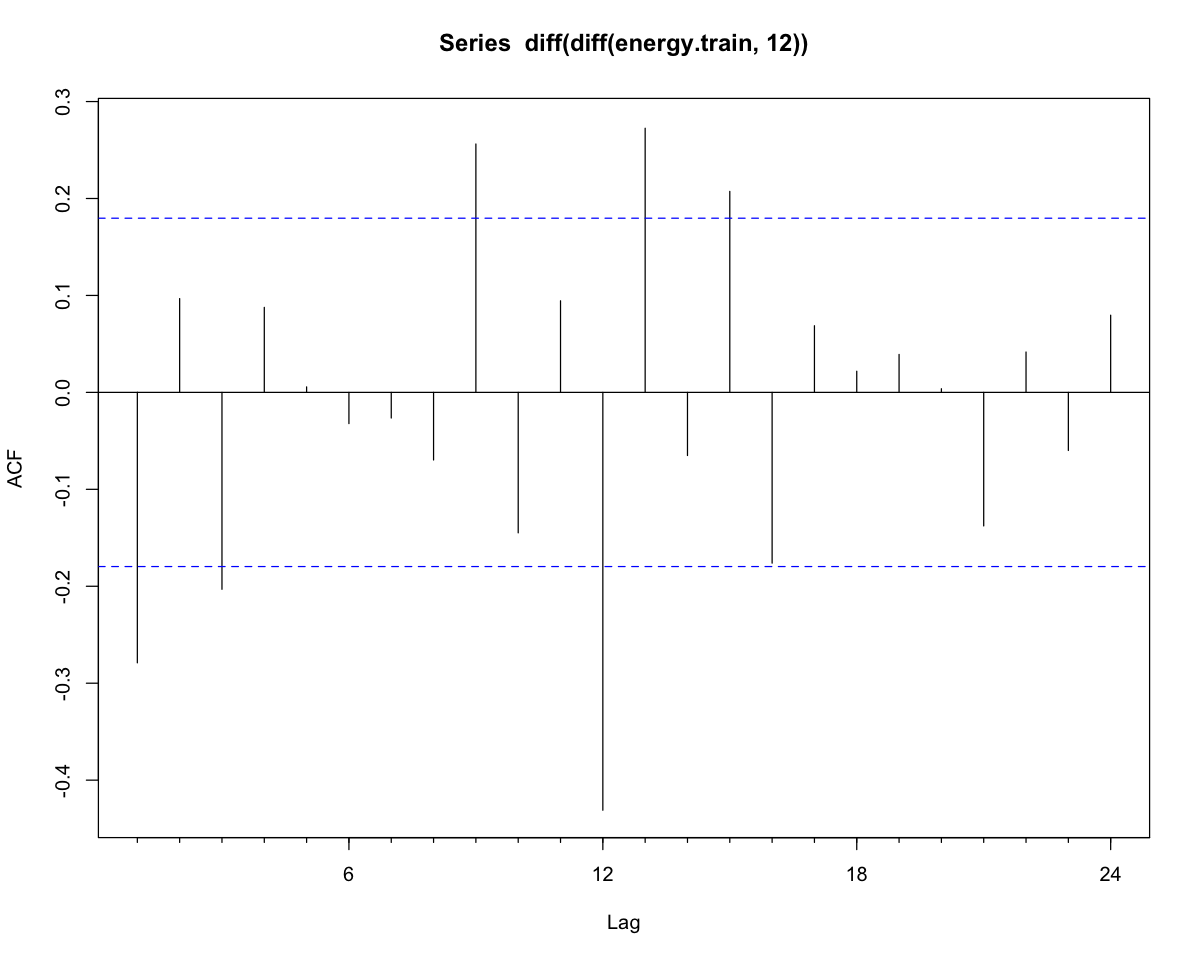

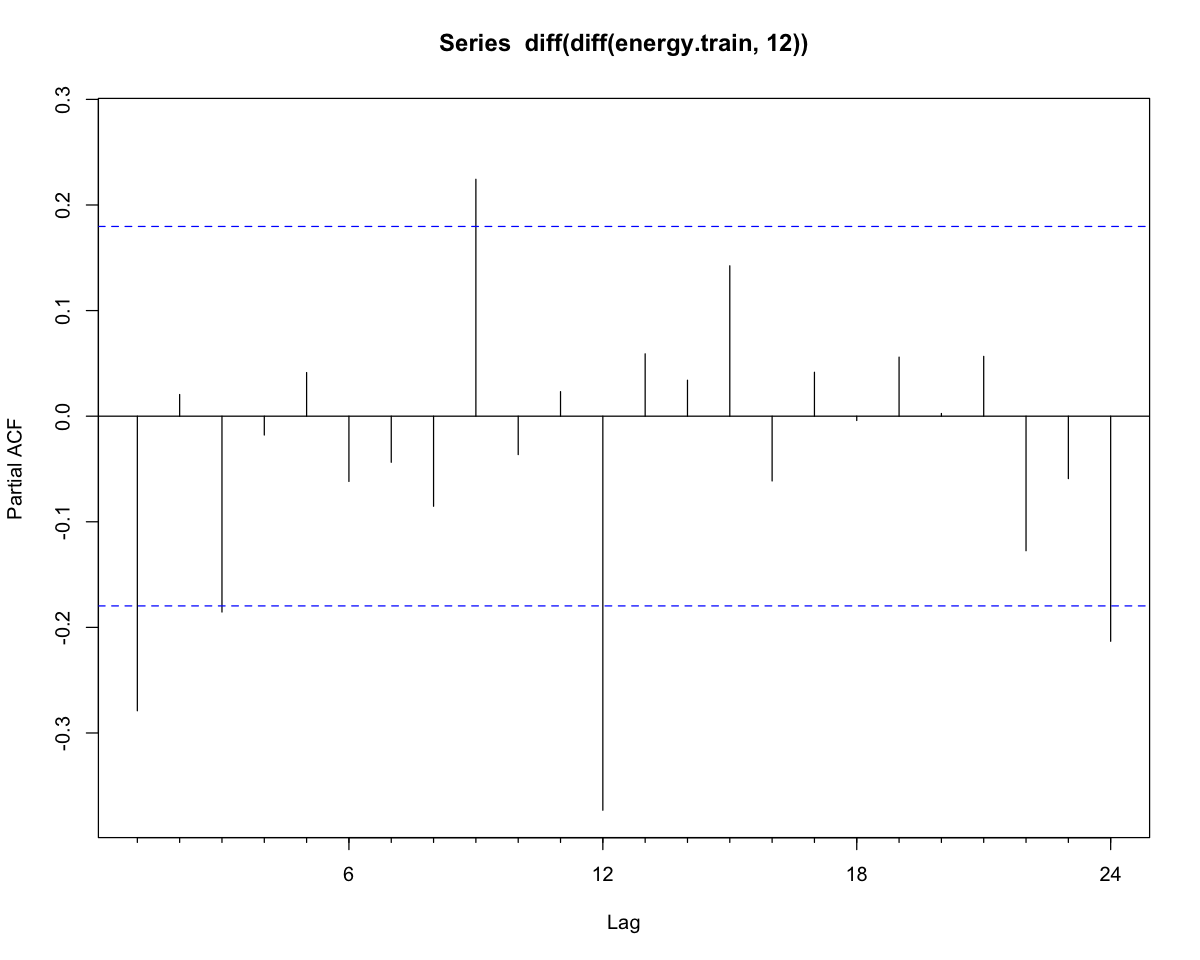

In [33]:
plot(diff(diff(energy.train,12)))
Acf(diff(diff(energy.train,12)))
Pacf(diff(diff(energy.train,12)))

Given there is seasonality and trend in the dataset, second order differencing is required to make the series stationary. After second order differencing, there are fewer significant autocorrelations. To determine the value of q and Q, it is reasonable to look at the first lag(k) that the correlation becomes statistically insignificant, then the value of q and Q can be k-1. Based on the inference, several models are tried, the result informs that the final arima model has the best performance.

## Model plot (0.75 marks)

Create a time plot of the data in black with a gap between the training set and test set data.

Show the fitted values of the model graphed in blue. Show the forecasts for the test set with a bold blue line and the 80% and 95% prediction intervals as shaded regions.

Prepare this plot for publication and upload it.

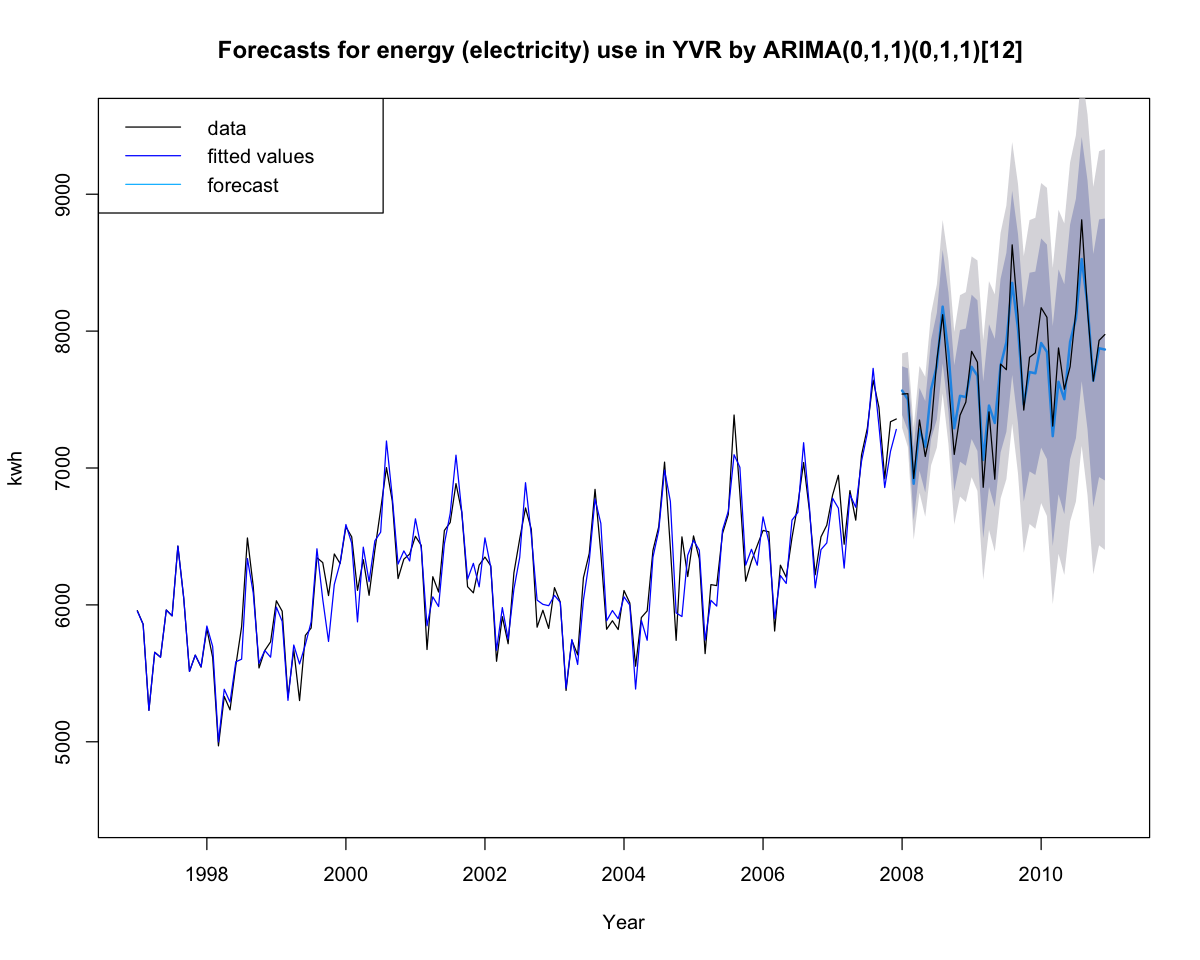

In [97]:
plot(forecast(fit.arima,36), main="Forecasts for energy (electricity) use in YVR by ARIMA(0,1,1)(0,1,1)[12] ",
      ylab = "kwh", xlab = "Year",xlim=c(1997,2011),ylim=c(4500,9500))
lines(energy.test) 
lines(fitted(fit.arima), col="blue") 
legend("topleft",lty=1, col=c("black","blue","deepskyblue"),c("data","fitted values","forecast")) 

## Goodness of fit (1 mark)

Quantify and discuss the goodness of fit of the model to the training set. You can compare this model to other ARIMA models that you tried. (Present any values, then 4 sentences max.)

In [86]:
# The code to create the table is included in Appendix B
ari_accuracy

ari.models,RMSE,MAE,MAPE,MASE
final.arima.model,158.51113220791,124.120395904124,1.65763622831948,0.468408312110663
fit.arima.c1,394.172996408733,334.695113926514,4.48659747635255,1.26307986889684
fit.arima.c2,486.808021641716,412.977108446169,5.52004784043308,1.55850220182213
fit.arima.c3,303.767267433805,240.159387225584,3.09629039537687,0.906318839772002
fit.arima.c4,226.301006632373,169.202387317783,2.17574132623762,0.638539734515819
fit.arima.c5,174.772036058216,135.149074850362,1.77562480263701,0.510028586138858
fit.arima.c6,553.438606953533,494.708333333333,6.47069721615674,1.86694131706397
fit.arima.c7,376.73115506216,309.897222222257,4.03206634043852,1.16949703335653
fit.arima.c8,752.885311097692,669.291666666668,8.90316532893802,2.52578778539531


This model has relatively low AIC and AICc and has the lowest RMSE, MAE, MAPE and MASE compared to the candidate models. Hence, out of all the models, this model has the highest accuracy while not overfitting. 

## Accuracy measures (1 mark)
Calculate the accuracy measures (RMSE, MAE, MAPE, MASE) to show how well the model forecasts for the test set.

In [35]:
#The accuracy measures of basic methods
basic_accuracy

method,RMSE,MAE,MAPE,MASE
mean method,1528.49822382884,1463.79545454545,18.7755758201661,5.52410386016273
drift method,415.979012553523,328.482400339271,4.21328577080877,1.23963419210996
naive method,550.058809987118,443.194444444444,5.60345284112793,1.67253705683796
seasonal naive method,698.657283652006,626.833333333333,8.03862417905933,2.36555758223788


In [74]:
#The accuracy measures of ETS model
accuracy(forecast(fit.ets),energy.test)[2,c(2,3,5,6)]

RMSE         MAE        MAPE        MASE 
159.1078835 126.2764047   1.6950883   0.4765447

In [63]:
#The accuracy measures of Arima model
accuracy(forecast(fit.arima),energy.test)[2,c(2,3,5,6)]

RMSE         MAE        MAPE        MASE 
158.5111322 124.1203959   1.6576362   0.4684083

## Accuracy of forecasts (1 mark)
Discuss how well this model forecasts the test set based on any plots or values that you calculated in previous questions. Remember that you can compare it to the basic methods. (4 sentences max.)

The arima model has a much higher accuracy compared with the four basic methods and has a similar level of accuracy as the ETS model in terms of RMSE, MAE, MAPE, MASE. The arima model not only can capture the trend of the actual data, but also can capture the seasonality of it.

## Residual diagnostics (3.5 marks)

a) Calculate the mean of the residuals. Does this value indicate bias? (0.5 marks)  
b) Use the checkresiduals() function. Which properties of residuals have been met or not met according to these plots? (2 marks)  
c) Interpret the results of a portmanteau test for autocorrelations. Clearly state the hypotheses, the number of lags tested, the test statistic, p-value, decision, and concluding sentence. (1 mark)  

In [61]:
mean(residuals(fit.arima))

[1] 9.851918

The mean of the residuals of an ARIMA model is significantly different from zero, it may indicate that the model is biased.


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(0,1,1)[12]
Q* = 17.582, df = 22, p-value = 0.7305

Model df: 2.   Total lags used: 24



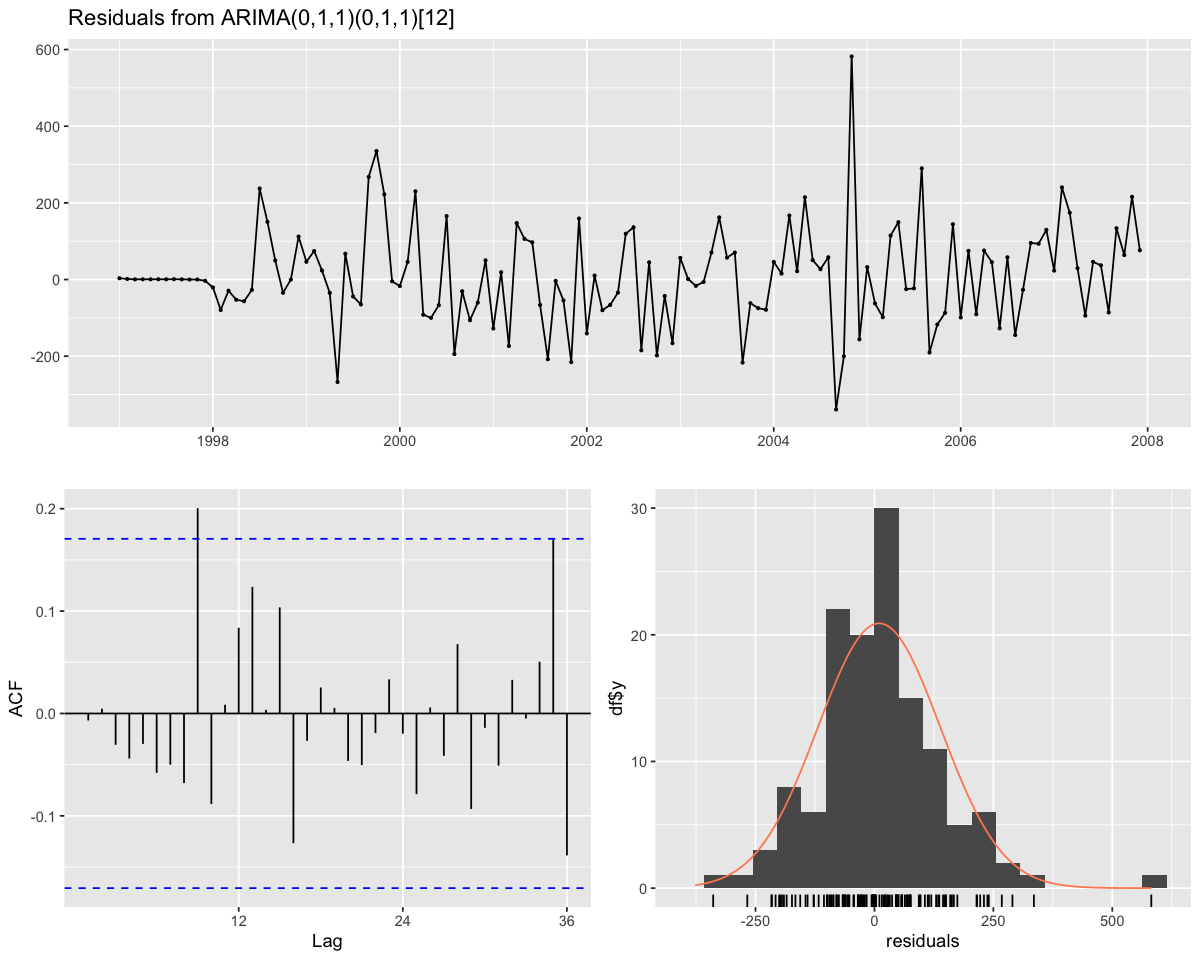

In [60]:
checkresiduals(fit.arima)

**(1)Time series plot of the residuals:**

The time series plot of the residuals shows that the residuals are randomly distributed around zero with no clear patterns or trends, which means the model is able to capture important features of the time series.

**(2)ACF plot of the residuals:**

The ACF plot of the residuals shows that the ACF is close to zero for almost all lags, which indicates there is no autocorrelation in the residuals. It could suggest that the model is capturing important features of the time series.

**(3)Histogram of the residuals:**

The histogram of the residuals indicates that the residuals can be considered as normally distributed.

The p-value of the Ljung-Box test is about 0.73, which is greater than 0.05. In Ljung-Box test, when the p-value is large (greater than 0.05), it indicates that there is not enough evidence to reject the null hypothesis, and that the residuals are likely to be independently and identically distributed with zero autocorrelation. This suggests that the time series model is a good fit for the data.

----

<div class="alert alert-block alert-warning">
<a id="Comparison"></a>

# Comparison of models (200 words max.) (2 marks)  

Compare your exponential smoothing/ETS model, your ARIMA model, and the basic methods. Which one is your best forecasting method (this will be your final model that is used in the next two sections)? Explain using support from previous questions as well as by creating a plot to compare the forecasts for the test set for the different methods.  
<div>


ETS is the best forecasting method for the following reasons:
1. ETS has comparable accuracy to ARIMA model
2. ETS has lower forecasting errors than basic forecasting methods as it is able to incorporate both the additive trend and seasonality, and multiplicative errors into its forecast. 
3. ARIMA model has bias as mean residuals is not close to 0


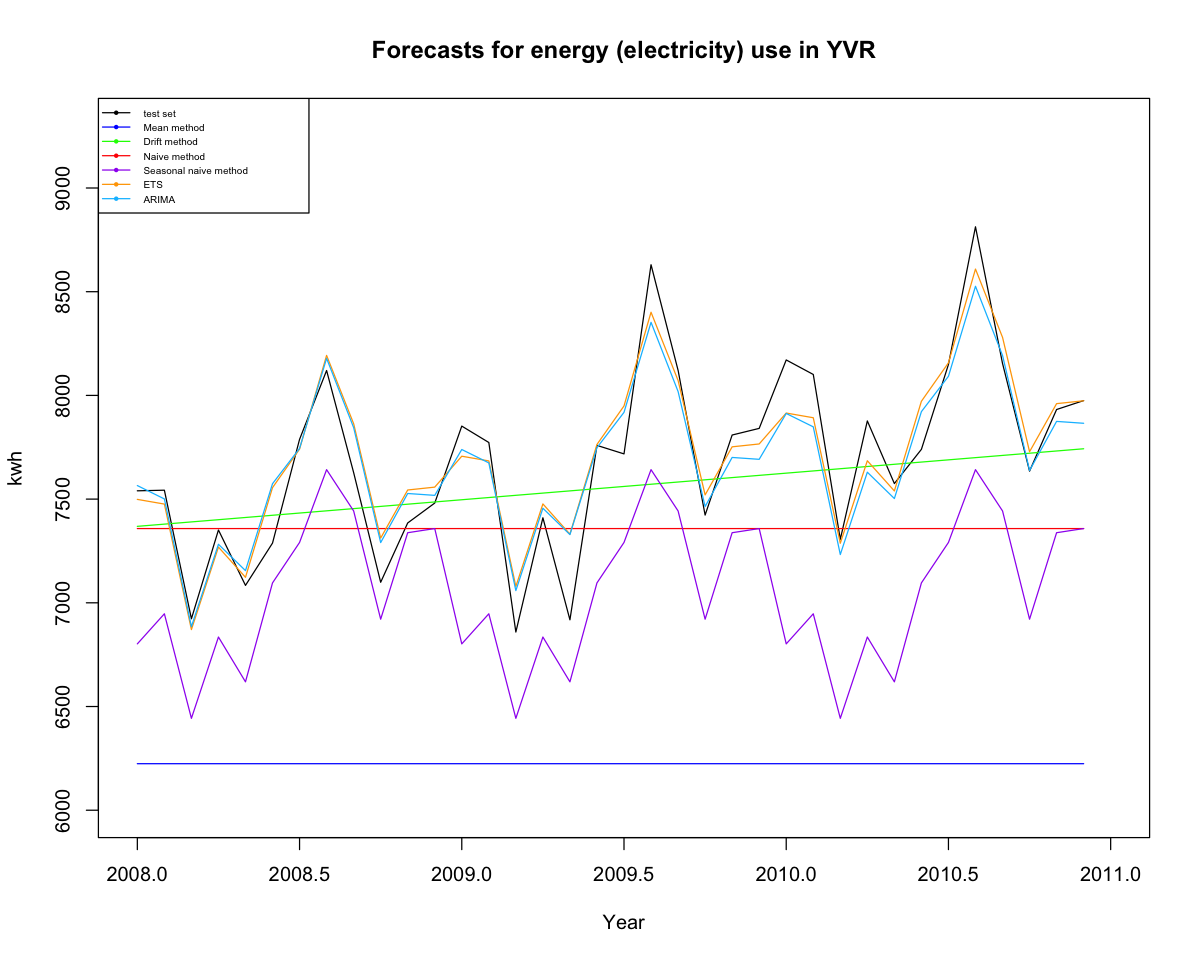

In [117]:
plot(energy.test, main="Forecasts for energy (electricity) use in YVR",
     ylab = "kwh", xlab = "Year",xlim=c(2008,2011),ylim=c(6000,9300))

lines(fit1$mean,col="blue")
lines(fit2$mean,col="green")
lines(fit3$mean,col="red")
lines(fit4$mean,col="purple")
lines(forecast(fit.ets,36)$mean,col="orange")
lines(forecast(fit.arima,36)$mean,col="deepskyblue")

legend("topleft",lty=1, col=c("black","blue","green","red","purple","orange","deepskyblue"),
       c("test set","Mean method","Drift method","Naive method","Seasonal naive method",
         "ETS","ARIMA"),cex=0.5,pch=16)                                                                                              

<div class="alert alert-block alert-info"> 
<a id="Forecasts"></a>   
    
# Forecasts (1.25 marks)

Calculate the point forecasts using your final model for the next three years (January 2011 through December 2013).

Plot the entire dataset with the forecasts from your best forecasting method, including prediction intervals.
</div>

In [130]:
forecast.ets <- forecast(fit.ets,72)$mean
point_forecasts <-tail(forecast.ets, n = 36);point_forecasts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2011,8123.144,8100.510,7495.289,7893.020,7747.476,8179.839,8365.424,8817.348,8488.254,7936.608,8168.424,8182.257
2012,8331.295,8308.661,7703.440,8101.171,7955.627,8387.990,8573.575,9025.500,8696.405,8144.759,8376.576,8390.408
2013,8539.446,8516.812,7911.591,8309.322,8163.778,8596.141,8781.726,9233.651,8904.556,8352.910,8584.727,8598.559


<div class="alert alert-block alert-warning">
<a id="Discussion"></a>

# Discussion (300 words max.) (3 marks)

Discuss three limitations of this final model, and recommendations to address these limitations. (300 words max.)
<div>


Limitation 1:The limitations of the final model is that forecasts can be impacted by outliers in the training dataset. For example, adverse weather conditions, issues with international travel and pandemic shutdown can all impact the accuracy of the final model. To address this limitation, outliers should be removed before training the model.  

Limitation 2: Since ETS model only forecasts based on historical time data, we are unable to infer the factors that influence energy use. This greatly limits the usefulness of the forecast since we don't know which equipment is causing energy use to rise. To address this limitation, it is recommended to conduct regression analysis and equipment analysis alongside time series forecast.      

Limitation 3: The final model only considers factors within the dataset. It does not account for external factors that may impact energy usage. For example, YVR is already undertaking efforts to reduce energy usage. Since the model has not incorporated the potential impacts of these projects, accuracy of forecast will be diminished. This limitation can be partially addressed by understanding the impact of the energy savings projects and dampen the forecast appropriately. 

<div class="alert alert-block alert-success">
<a id="Explanatory"></a>

# Explanatory model (200 words max.) (2 marks)

Describe a possible explanatory model to try (you do not have to create this model). Explain the process required to be able to use this model to forecast.  
</div>

A possible explanatory model to try is a multivariable linear regression model which incorporates mean temperature, total area, domestic, us and international passengers. The number of passengers may impact energy use, as more passengers require more facilities and electrical equipments.

The process required is to first break the dataset into training set and test set. Next, identify the type and strength of association between each explanatory variable and energy use. Ensure explanatory variables do not correlate with each other. Transform the explanatory variables if necessary to make the associations linear. Then fit candidate models and test goodness of fit and compare model coefficients. Pick the best candidate model and generate a forecast based on test dataset. Then compare mean errors of the final model against candidate models. Models with the highest accuracy can be used as an alternative model to ETS and ARIMA for forecasting energy use. 


----

<div class="alert alert-block alert-danger">
<a id="AppendixA"></a>

# Appendix A:
# ETS models (1 mark)
</div>

**Candidate ETS models**

In [45]:
fit.cets1<- ets(energy.train, model="ANN", damped=FALSE);fit.cets1

ETS(A,N,N) 

Call:
 ets(y = energy.train, model = "ANN", damped = FALSE) 

  Smoothing parameters:
    alpha = 0.6926 

  Initial states:
    l = 5880.5122 

  sigma:  364.291

     AIC     AICc      BIC 
2205.574 2205.762 2214.223 

This model is not picked as it has higher AIC, AICc and forecasting errors than final model

In [46]:
fit.cets2<- ets(energy.train, model="AAN", damped=FALSE);fit.cets2

ETS(A,A,N) 

Call:
 ets(y = energy.train, model = "AAN", damped = FALSE) 

  Smoothing parameters:
    alpha = 0.6889 
    beta  = 1e-04 

  Initial states:
    l = 5744.5508 
    b = 26.8225 

  sigma:  367.6078

     AIC     AICc      BIC 
2209.920 2210.397 2224.334 

This model is not picked as it has higher AIC, AICc and forecasting errors than final model

In [47]:
fit.cets3<- ets(energy.train, model="ANA", damped=FALSE);fit.cets3

ETS(A,N,A) 

Call:
 ets(y = energy.train, model = "ANA", damped = FALSE) 

  Smoothing parameters:
    alpha = 0.8142 
    gamma = 1e-04 

  Initial states:
    l = 6028.2465 
    s = -53.9951 -35.1353 -238.2527 322.9962 671.4127 226.3734
           66.8415 -359.4489 -191.2235 -589.7391 56.3954 123.7755

  sigma:  133.9544

     AIC     AICc      BIC 
1952.670 1956.808 1995.912 

This model is not picked as it has lower AIC and AICc but has higher forecasting errors suggesting overfit compared to the final model.

In [48]:
fit.cets4<- ets(energy.train, model="AAN", damped=TRUE);fit.cets4

ETS(A,Ad,N) 

Call:
 ets(y = energy.train, model = "AAN", damped = TRUE) 

  Smoothing parameters:
    alpha = 0.6851 
    beta  = 1e-04 
    phi   = 0.98 

  Initial states:
    l = 5738.458 
    b = 27.266 

  sigma:  368.8201

     AIC     AICc      BIC 
2211.754 2212.426 2229.051 

This model is not picked as it has higher AIC, AICc and forecasting errors than final model

In [49]:
fit.cets5<- ets(energy.train, model="AAA", damped=TRUE);fit.cets5

ETS(A,Ad,A) 

Call:
 ets(y = energy.train, model = "AAA", damped = TRUE) 

  Smoothing parameters:
    alpha = 0.7931 
    beta  = 1e-04 
    gamma = 1e-04 
    phi   = 0.98 

  Initial states:
    l = 5805.4606 
    b = 13.8362 
    s = -38.863 -43.2456 -244.5016 321 668.501 230.8188
           64.3729 -346.505 -192.5901 -569.7257 56.5733 94.1652

  sigma:  135.8223

     AIC     AICc      BIC 
1958.927 1964.980 2010.817 

This model is not picked as it has higher AIC, AICc and forecasting errors than final model

In [50]:
fit.cets6<- ets(energy.train, model="AAA", damped=FALSE);fit.cets6

ETS(A,A,A) 

Call:
 ets(y = energy.train, model = "AAA", damped = FALSE) 

  Smoothing parameters:
    alpha = 0.7846 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 5879.3546 
    b = 12.3652 
    s = -36.7977 -27.2016 -238.1219 321.0426 666.3048 232.4424
           58.5104 -349.8579 -192.2142 -564.3842 38.3341 91.9432

  sigma:  134.6878

     AIC     AICc      BIC 
1955.855 1961.224 2004.863 

This model is not picked as it has lower AIC and AICc but has higher forecasting errors suggesting overfit compared to the final model.

**Compare the accuracy**

In [72]:
ets.models <- c("final.ets.model", "fit.cets1", "fit.cets2", "fit.cets3","fit.cets4","fit.cets5","fit.cets6")
ets_accuracy <- cbind(ets.models, 
      rbind( accuracy(forecast(fit.ets),energy.test)[2,c(2,3,5,6)],
      accuracy(forecast(fit.cets1),energy.test)[2,c(2,3,5,6)],
      accuracy(forecast(fit.cets2),energy.test)[2,c(2,3,5,6)],
      accuracy(forecast(fit.cets3),energy.test)[2,c(2,3,5,6)],
      accuracy(forecast(fit.cets4),energy.test)[2,c(2,3,5,6)],
      accuracy(forecast(fit.cets5),energy.test)[2,c(2,3,5,6)],
      accuracy(forecast(fit.cets6),energy.test)[2,c(2,3,5,6)]))
ets_accuracy

ets.models,RMSE,MAE,MAPE,MASE
final.ets.model,159.107883503278,126.27640468394,1.69508827335497,0.476544706021537
fit.cets1,472.406055317822,377.632570007381,4.88094130788208,1.42511819614082
fit.cets2,401.692078131953,316.864542243945,4.26444445563058,1.19579046069795
fit.cets3,249.836172030664,196.231594856607,2.53324844896596,0.740543159406026
fit.cets4,459.220423700894,364.748777157687,4.72108211866939,1.37649705198196
fit.cets5,249.422121023095,196.993618537518,2.54183420192762,0.74341890133034
fit.cets6,158.428396804037,130.920396628833,1.72536819500591,0.494070306165796


---

<div class="alert alert-block alert-danger">
<a id="AppendixB"></a>

# Appendix B:
# ARIMA Models (1 mark)
</div>

**Candidate ARIMA Models**

In [75]:
fit.arima.c1<-auto.arima(energy.train);fit.arima.c1

Series: energy.train 
ARIMA(1,1,0)(2,1,0)[12] 

Coefficients:
          ar1     sar1     sar2
      -0.2482  -0.4993  -0.2136
s.e.   0.0909   0.0937   0.1006

sigma^2 = 24330:  log likelihood = -769.95
AIC=1547.9   AICc=1548.25   BIC=1559.01

This model is not picked as it has higher AIC, AICc and forecasting errors than final model

In [76]:
fit.arima.c2<-Arima(energy.train, order = c(1, 1, 1), seasonal = c(1, 1, 0),include.constant=TRUE);fit.arima.c2

Series: energy.train 
ARIMA(1,1,1)(1,1,0)[12] 

Coefficients:
          ar1      ma1     sar1
      -0.1296  -0.0903  -0.4065
s.e.   0.6057   0.6144   0.0831

sigma^2 = 25486:  log likelihood = -772.11
AIC=1552.23   AICc=1552.58   BIC=1563.35

This model is not picked as it has higher AIC, AICc and forecasting errors than final model

In [ ]:
fit.arima.c3<-Arima(energy.train, order = c(1, 0, 1), seasonal = c(0, 1, 1),include.constant=TRUE);fit.arima.c3

This model is not picked as it has higher AIC, AICc and forecasting errors than final model

In [78]:
fit.arima.c4<-Arima(energy.train, order = c(1, 0, 0), seasonal = c(0, 1, 0),include.constant=FALSE);fit.arima.c4

Series: energy.train 
ARIMA(1,0,0)(0,1,0)[12] 

Coefficients:
         ar1
      0.8713
s.e.  0.0461

sigma^2 = 30973:  log likelihood = -790.93
AIC=1585.85   AICc=1585.96   BIC=1591.43

This model is not picked as it has higher AIC, AICc and forecasting errors than final model

In [79]:
fit.arima.c5<-Arima(energy.train, order = c(1, 0, 0), seasonal = c(0, 1, 0),include.constant=TRUE);fit.arima.c5

Series: energy.train 
ARIMA(1,0,0)(0,1,0)[12] with drift 

Coefficients:
         ar1    drift
      0.8472  12.0313
s.e.  0.0495   8.3036

sigma^2 = 30806:  log likelihood = -790.02
AIC=1586.04   AICc=1586.24   BIC=1594.4

This model is not picked as it has higher AIC, AICc and forecasting errors than final model

In [80]:
fit.arima.c6<-Arima(energy.train, order = c(0, 0, 0), seasonal = c(0, 1, 0),include.constant=FALSE);fit.arima.c6

Series: energy.train 
ARIMA(0,0,0)(0,1,0)[12] 

sigma^2 = 117890:  log likelihood = -870.92
AIC=1743.84   AICc=1743.88   BIC=1746.63

This model is not picked as it has higher AIC, AICc and forecasting errors than final model

In [81]:
fit.arima.c7<-Arima(energy.train, order = c(0, 0, 0), seasonal = c(0, 1, 0),include.constant=TRUE);fit.arima.c7

Series: energy.train 
ARIMA(0,0,0)(0,1,0)[12] with drift 

Coefficients:
        drift
      10.6653
s.e.   2.4237

sigma^2 = 102363:  log likelihood = -861.95
AIC=1727.89   AICc=1727.99   BIC=1733.47

This model is not picked as it has higher AIC, AICc and forecasting errors than final model

In [82]:
fit.arima.c8<-Arima(energy.train, order = c(0, 1, 0), seasonal = c(0, 1, 0),include.constant=TRUE);fit.arima.c8

Series: energy.train 
ARIMA(0,1,0)(0,1,0)[12] 

sigma^2 = 32617:  log likelihood = -787.21
AIC=1576.41   AICc=1576.45   BIC=1579.19

This model is not picked as it has higher AIC, AICc and forecasting errors than final model

**Compare the accuracy**

In [85]:
ari.models <- c("final.arima.model", "fit.arima.c1", "fit.arima.c2",
                  "fit.arima.c3","fit.arima.c4", "fit.arima.c5",
                  "fit.arima.c6","fit.arima.c7", "fit.arima.c8")
ari_accuracy <- cbind(ari.models, 
      rbind( accuracy(forecast(fit.arima),energy.test)[2,c(2,3,5,6)],
      accuracy(forecast(fit.arima.c1),energy.test)[2,c(2,3,5,6)],
      accuracy(forecast(fit.arima.c2),energy.test)[2,c(2,3,5,6)],
      accuracy(forecast(fit.arima.c3),energy.test)[2,c(2,3,5,6)],
      accuracy(forecast(fit.arima.c4),energy.test)[2,c(2,3,5,6)],
      accuracy(forecast(fit.arima.c5),energy.test)[2,c(2,3,5,6)],
      accuracy(forecast(fit.arima.c6),energy.test)[2,c(2,3,5,6)],
      accuracy(forecast(fit.arima.c7),energy.test)[2,c(2,3,5,6)],
      accuracy(forecast(fit.arima.c8),energy.test)[2,c(2,3,5,6)]
      ))
ari_accuracy

ari.models,RMSE,MAE,MAPE,MASE
final.arima.model,158.51113220791,124.120395904124,1.65763622831948,0.468408312110663
fit.arima.c1,394.172996408733,334.695113926514,4.48659747635255,1.26307986889684
fit.arima.c2,486.808021641716,412.977108446169,5.52004784043308,1.55850220182213
fit.arima.c3,303.767267433805,240.159387225584,3.09629039537687,0.906318839772002
fit.arima.c4,226.301006632373,169.202387317783,2.17574132623762,0.638539734515819
fit.arima.c5,174.772036058216,135.149074850362,1.77562480263701,0.510028586138858
fit.arima.c6,553.438606953533,494.708333333333,6.47069721615674,1.86694131706397
fit.arima.c7,376.73115506216,309.897222222257,4.03206634043852,1.16949703335653
fit.arima.c8,752.885311097692,669.291666666668,8.90316532893802,2.52578778539531
